Введение

Проект: Обучение с учителем: качество модели.

Проект по разработке решения для интернет-магазина «В один клик» , которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.


Промаркировываем уровень финансовой активности постоянных покупателей:
- «снизился уровень», если клиент стал покупать меньше товаров;
- «прежний уровень».

Собрать данные по клиентам по следующим группам:
o	Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
o	Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
o	Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
o	Признаки, которые описывают поведение покупателя на сайте, как много страниц просматривает и сколько времени проводит на сайте.


Описание данных

*market_file.csv*
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:

* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

*market_money.csv*
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:

* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* Выручка — сумма выручки за период.


*market_time.csv*
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода:

* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
* минут — значение времени, проведённого на сайте, в минутах.


*money.csv*
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:

* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.


План работы:
1.	загрузить библиотеки;
2.	загрузить данные;
3.	провести предобработку данных;
4.	провести исследовательский анализ данных;
5.  объединение таблиц;
6.  провести корреляционный анализ;
7.  создание пайплайнов;
8.  провести анализ важности признаков;
9.  выполнить сегментация покупателей;
10. общий вывод.

## Загрузка данных

In [1]:
# загружаем библиотеки

!pip install -q phik
!pip install shap -q
!pip install --upgrade scikit-learn


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
import shap
import plotly.express as px

# загружаем классы
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    OrdinalEncoder,
    MinMaxScaler,
    LabelEncoder,
    RobustScaler
)

# загружаем классы для работы с пропусками

from sklearn.impute import SimpleImputer

from phik import phik_matrix
from phik.report import plot_correlation_matrix

# загружаем метрики

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score
)
from sklearn.metrics import ConfusionMatrixDisplay

# библиотеки для загрузки моделей
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# Константы

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
# загрузка csv-файлов с данными и сохраняем их в датафреймы pandas


try:
    df_market = pd.read_csv('/datasets/market_file.csv')
    df_money = pd.read_csv('/datasets/market_money.csv')
    df_time = pd.read_csv('/datasets/market_time.csv')
    df_income = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
except:
    df_market = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    df_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    df_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    df_income = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep = ';', decimal = ',')


In [4]:
# выведем общую информация и первые пять строчек датафрейма о поведении покупателя на сайте,
# о коммуникациях с покупателем и его продуктовом поведении.


display(df_market.info())
display(df_market.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0               3.400                     5           121              0.000   
1               4.400                     4           819              0.750   
2               4.900                     3           539              0.140   
3               3.200                     5           896              0.990   
4               5.100                     3          1064              0.940   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

В файле содержится 1300 строк. Названию столбцов требуется унификация и нижнего регистра. Визуально пропусков данных не наблюдается. Данный датафрейм подходит для работы на следующем эпате проекта - предобработка данных.  

In [5]:
# выведем общую информация и первые пять строчек датафрейма о выручки продавца


display(df_money.info())
display(df_money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

id               Период   Выручка
0  215348  препредыдущий_месяц     0.000
1  215348        текущий_месяц 3,293.100
2  215348     предыдущий_месяц     0.000
3  215349  препредыдущий_месяц 4,472.000
4  215349        текущий_месяц 4,971.600

В файле содержится 3900 строк. Названию столбцов требуется нижний регистр. Предварительно: 1300 строк за три месяца. Визуально пропусков данных не наблюдается. Данный датафрейм подходит для работы на следующем эпате проекта - предобработка данных.  

In [6]:
# выведем общую информация и первые пять строчек датафрейма о проведенном времени покупателем на сайте


display(df_time.info())
display(df_time.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

В файле содержится 2600 строк. Названию столбца "Период" требуется нижний регистр. Предварительно: 1300 строк за два месяца. Визуально пропусков данных не наблюдается. Данный датафрейм подходит для работы на следующем эпате проекта - предобработка данных.

In [7]:
# выведем общую информация и первые пять строчек датафрейма о среднемесячной прибыли продавца


display(df_income.info())
display(df_income.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

id  Прибыль
0  215348    0.980
1  215349    4.160
2  215350    3.130
3  215351    4.870
4  215352    4.210

В файле содержится 1300 строк. Названию столбца "Прибыль" требуется нижний регистр и перевод из типа "object" в "float". Визуально пропусков данных не наблюдается. Данный датафрейм подходит для работы на следующем эпате проекта - предобработка данных.

В нашем распоряжении четыре файла с данными от интернет-магазин «В один клик». Первый файл содержит информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Состоит из 1300 строк и 13 столбцов. Второй файл содержит информацию: о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Датафрейм состоит из 3900 строк и 3 столбцов. Третий файл с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Датафрейм состоит из 2600 строк и 3 столбцов. Четвертый файл с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Датафрейм состоит из 1300 строк и 2 столбцов.
Критических ошибок при чтении файлов не обнаружено и данные датафреймов можно использовать далее для предобработке и анализа.

## Предобработка данных

In [8]:
# преведение названия столбцов датафреймов к нижниму регистру


df_market.columns = df_market.columns.str.lower().str.replace(' ', '_').str.replace(',', '_').str.replace('__', '_')
df_money.columns = df_money.columns.str.lower()
df_time.columns = df_time.columns.str.lower()
df_income.columns = df_income.columns.str.lower()


# выведение названия столбцов датафреймов


display('DataFrame_market:', df_market.columns)
display('DataFrame_money:', df_money.columns)
display('DataFrame_time:', df_time.columns)
display('DataFrame_income:', df_income.columns)

'DataFrame_market:'

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

'DataFrame_money:'

Index(['id', 'период', 'выручка'], dtype='object')

'DataFrame_time:'

Index(['id', 'период', 'минут'], dtype='object')

'DataFrame_income:'

Index(['id', 'прибыль'], dtype='object')

In [9]:
# перевод из типа object в тип float для столбца "прибыль"


df_income['прибыль'] = df_income['прибыль'].replace(to_replace = ',', value = '.', regex = True)
#df_income['прибыль'] = df_income['прибыль'].astype('float') # исправлено при загрузке файла

display('Тип столбца "прибыль" DataFrame_income', df_income['прибыль'].dtypes)

'Тип столбца "прибыль" DataFrame_income'

dtype('float64')

In [10]:
# проверка на явные дубликаты


display(df_market.duplicated().sum())
display(df_money.duplicated().sum())
display(df_time.duplicated().sum())
display(df_income.duplicated().sum())

np.int64(0)

np.int64(0)

np.int64(0)

np.int64(0)

In [11]:
display(df_market[df_market['тип_сервиса']=='стандартт'])

id покупательская_активность тип_сервиса разрешить_сообщать  \
2    215350                 Снизилась   стандартт                нет   
3    215351                 Снизилась   стандартт                 да   
4    215352                 Снизилась   стандартт                нет   
5    215353                 Снизилась   стандартт                 да   
6    215354                 Снизилась   стандартт                 да   
7    215355                 Снизилась   стандартт                нет   
8    215356                 Снизилась   стандартт                 да   
9    215357                 Снизилась   стандартт                 да   
10   215358                 Снизилась   стандартт                 да   
400  215748           Прежний уровень   стандартт                нет   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
2                 4.900                     3           539   
3                 3.200                     5           896   
4                 5.100                     3          1064   
5                 3.300                     4           762   
6                 5.100                     3           431   
7                 4.700                     4           284   
8                 4.200                     4           192   
9                 3.900                     5           154   
10                4.700                     4           450   
400               4.300                     4           534   

     акционные_покупки            популярная_категория  \
2                0.140               Домашний текстиль   
3                0.990                Товары для детей   
4                0.940                Товары для детей   
5                0.260               Домашний текстиль   
6                0.230           Косметика и аксесуары   
7                0.170                Товары для детей   
8                0.140           Косметика и аксесуары   
9                0.000  Техника для красоты и здоровья   
10               0.130               Домашний текстиль   
400              0.180                 Кухонная посуда   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
2                                      5                                   2   
3                                      5                                   0   
4                                      3                                   2   
5                                      4                                   1   
6                                      2                                   3   
7                                      5                                   1   
8                                      2                                   2   
9                                      3                                   3   
10                                     4                                   2   
400                                    3                                   1   

     ошибка_сервиса  страниц_за_визит  
2                 1                 5  
3                 6                 4  
4                 3                 2  
5                 1                 4  
6                 7                 2  
7                 6                 4  
8                 1                 3  
9                 9                 5  
10                6                 4  
400               4                10

In [12]:
# проверка на неявные дубликаты датафрейма df_market


unique_check_df_market = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
for i in unique_check_df_market:
    display(df_market[i].unique())

array(['Снизилась', 'Прежний уровень'], dtype=object)

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [13]:
# визуально проверяем тип сервиса "стандартт" на особенности (спец.маркировка)


display(df_market[df_market['тип_сервиса']=='стандартт'])


# замещаем "стандартт" на "стандарт"


df_market['тип_сервиса'] = df_market['тип_сервиса'].replace('стандартт', 'стандарт')
display('после исправления неявного дублика', df_market['тип_сервиса'].unique())

id покупательская_активность тип_сервиса разрешить_сообщать  \
2    215350                 Снизилась   стандартт                нет   
3    215351                 Снизилась   стандартт                 да   
4    215352                 Снизилась   стандартт                нет   
5    215353                 Снизилась   стандартт                 да   
6    215354                 Снизилась   стандартт                 да   
7    215355                 Снизилась   стандартт                нет   
8    215356                 Снизилась   стандартт                 да   
9    215357                 Снизилась   стандартт                 да   
10   215358                 Снизилась   стандартт                 да   
400  215748           Прежний уровень   стандартт                нет   

     маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
2                 4.900                     3           539   
3                 3.200                     5           896   
4                 5.100                     3          1064   
5                 3.300                     4           762   
6                 5.100                     3           431   
7                 4.700                     4           284   
8                 4.200                     4           192   
9                 3.900                     5           154   
10                4.700                     4           450   
400               4.300                     4           534   

     акционные_покупки            популярная_категория  \
2                0.140               Домашний текстиль   
3                0.990                Товары для детей   
4                0.940                Товары для детей   
5                0.260               Домашний текстиль   
6                0.230           Косметика и аксесуары   
7                0.170                Товары для детей   
8                0.140           Косметика и аксесуары   
9                0.000  Техника для красоты и здоровья   
10               0.130               Домашний текстиль   
400              0.180                 Кухонная посуда   

     средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
2                                      5                                   2   
3                                      5                                   0   
4                                      3                                   2   
5                                      4                                   1   
6                                      2                                   3   
7                                      5                                   1   
8                                      2                                   2   
9                                      3                                   3   
10                                     4                                   2   
400                                    3                                   1   

     ошибка_сервиса  страниц_за_визит  
2                 1                 5  
3                 6                 4  
4                 3                 2  
5                 1                 4  
6                 7                 2  
7                 6                 4  
8                 1                 3  
9                 9                 5  
10                6                 4  
400               4                10

'после исправления неявного дублика'

array(['премиум', 'стандарт'], dtype=object)

In [14]:
# проверка на неявные дубликаты датафрейма df_money


unique_check_df_money = ['период']
for i in unique_check_df_money:
    display(df_money[i].unique())

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [15]:
# проверка на неявные дубликаты датафрейма df_time


unique_check_df_time = ['период']
for i in unique_check_df_time:
    display(df_time[i].unique())

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [16]:
# исправление орфографической ошибки в df_time с 'предыдцщий_месяц' на 'предыдцщий_месяц'


df_time['период'] = df_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
display(df_time['период'].unique())

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Были проведены следующие операции:
1) в четырех датафреймах название столбцов переведены в нижний регистр и заменены пробелы на "нижнее подчеркивание";
2) в датафрейме df_income столбец "прибыль" был переведен из типа object в тип float;
3) явные дубликаты не выявлены;
4) выявлен один неявный дубликат в датафрейме df_market в столбце "тип_сервиса". Заменили "стандартт" на "стандарт";
5) исправлена орфографическая ошибка в df_time в столбце "период".
Приступаем к исследовательскому анализу данных.

## Исследовательский анализ данных

In [17]:
# проверим кол-во уникальных ID во всех файлах


display('DataFrame_market:', df_market['id'].nunique())
display('DataFrame_money:', df_money['id'].nunique())
display('DataFrame_time:', df_time['id'].nunique())
display('DataFrame_income:', df_income['id'].nunique())

'DataFrame_market:'

1300

'DataFrame_money:'

1300

'DataFrame_time:'

1300

'DataFrame_income:'

1300

In [18]:
# статистика по датафрейму df_market


display('DataFrame_market:')
display(df_market.shape)
display(df_market.columns)
display(df_market.head())
display(df_market.describe().T)

'DataFrame_market:'

(1300, 13)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0               3.400                     5           121              0.000   
1               4.400                     4           819              0.750   
2               4.900                     3           539              0.140   
3               3.200                     5           896              0.990   
4               5.100                     3          1064              0.940   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

count        mean     std         min  \
id                                  1,300.000 215,997.500 375.422 215,348.000   
маркет_актив_6_мес                  1,300.000       4.254   1.015       0.900   
маркет_актив_тек_мес                1,300.000       4.012   0.697       3.000   
длительность                        1,300.000     601.898 249.856     110.000   
акционные_покупки                   1,300.000       0.320   0.250       0.000   
средний_просмотр_категорий_за_визит 1,300.000       3.270   1.355       1.000   
неоплаченные_продукты_штук_квартал  1,300.000       2.840   1.971       0.000   
ошибка_сервиса                      1,300.000       4.185   1.955       0.000   
страниц_за_визит                    1,300.000       8.177   3.978       1.000   

                                            25%         50%         75%  \
id                                  215,672.750 215,997.500 216,322.250   
маркет_актив_6_мес                        3.700       4.200       4.900   
маркет_актив_тек_мес                      4.000       4.000       4.000   
длительность                            405.500     606.000     806.000   
акционные_покупки                         0.170       0.240       0.300   
средний_просмотр_категорий_за_визит       2.000       3.000       4.000   
неоплаченные_продукты_штук_квартал        1.000       3.000       4.000   
ошибка_сервиса                            3.000       4.000       6.000   
страниц_за_визит                          5.000       8.000      11.000   

                                            max  
id                                  216,647.000  
маркет_актив_6_мес                        6.600  
маркет_актив_тек_мес                      5.000  
длительность                          1,079.000  
акционные_покупки                         0.990  
средний_просмотр_категорий_за_визит       6.000  
неоплаченные_продукты_штук_квартал       10.000  
ошибка_сервиса                            9.000  
страниц_за_визит                         20.000

покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

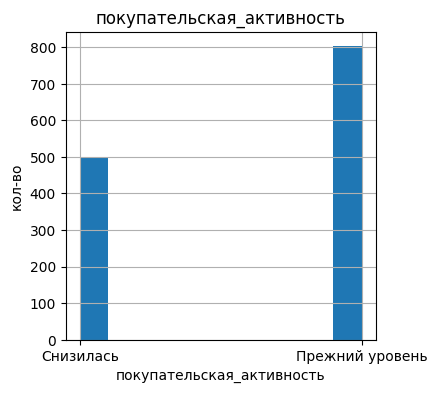

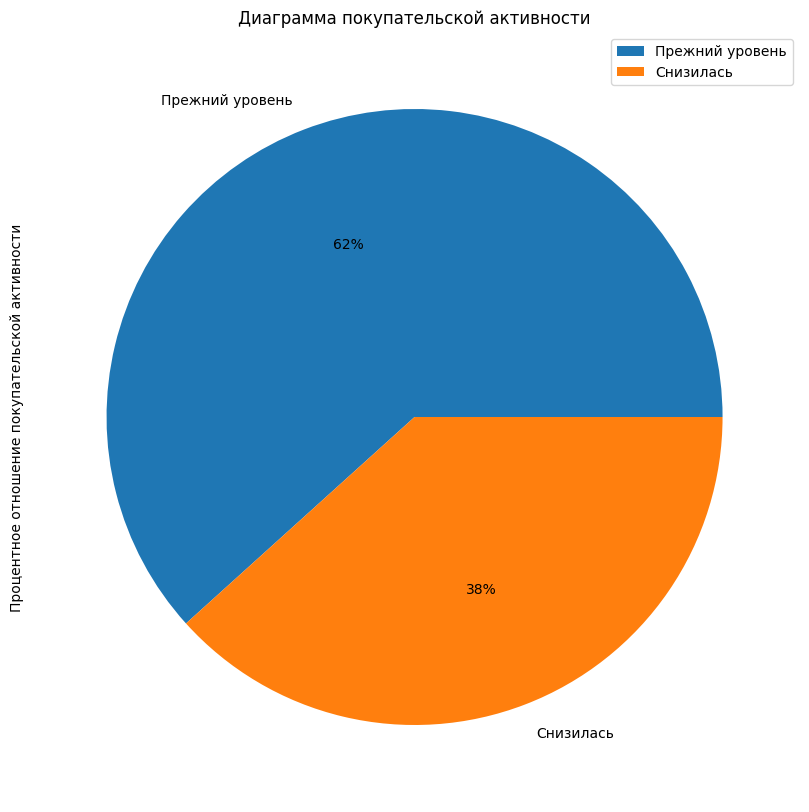

In [19]:
# целевой признак:'покупательская_активность'

c_columns = ['покупательская_активность']
for i in c_columns:
    display(df_market[i].value_counts())
    df_market[i].hist(figsize=(4,4))
    plt.ylabel('кол-во')
    plt.xlabel(i)
    plt.title(i)
    plt.show()

df_market.pivot_table(
    index='покупательская_активность',
    values='id',aggfunc='count').plot.pie(y='id',
                                          autopct='%1.0f%%',
                                          figsize=(10,10),
                                          label='Процентное отношение покупательской активности')

plt.title('Диаграмма покупательской активности')
plt.show()

Целевой признак имеет распределение 62% прежний уровень и 38% снизилось.

тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

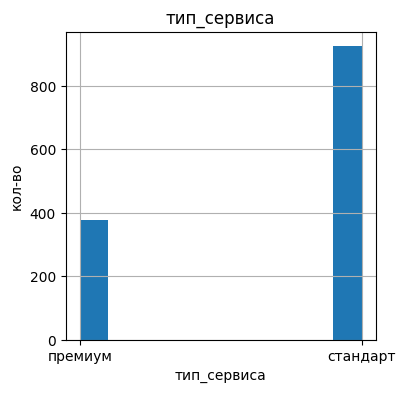

разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64

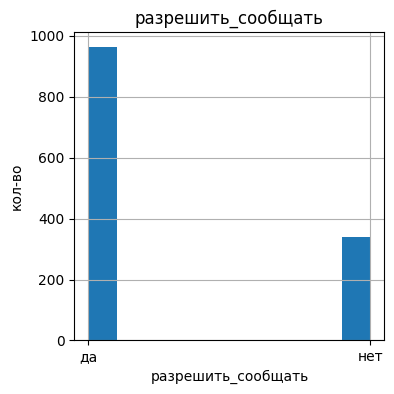

популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

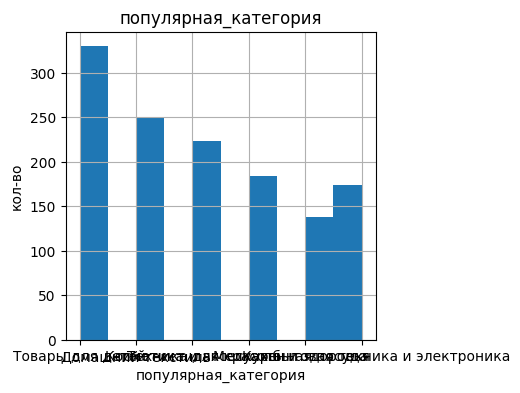

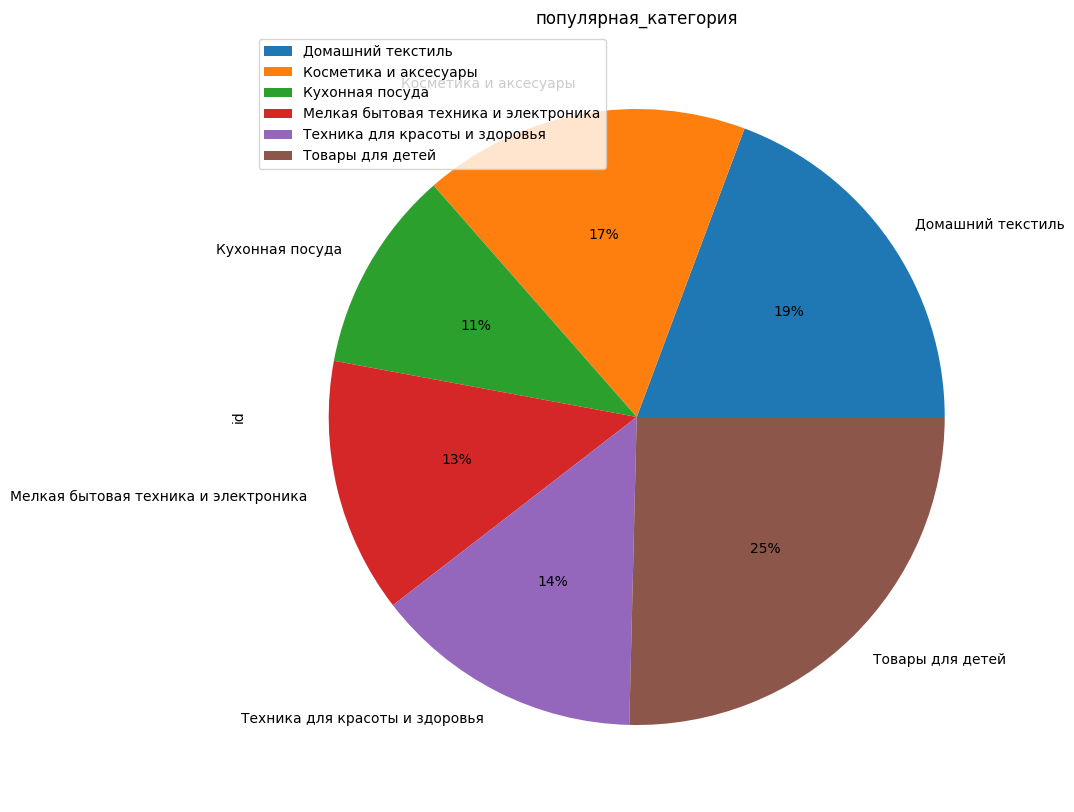

In [20]:
# категориальные признаки

c_columns = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
for i in c_columns:
    display(df_market[i].value_counts())
    df_market[i].hist(figsize=(4,4))
    plt.ylabel('кол-во')
    plt.xlabel(i)
    plt.title(i)
    plt.show()

df_market.pivot_table(
    index='популярная_категория',
    values='id',aggfunc='count').plot.pie(y='id',
                                          autopct='%1.0f%%',
                                          figsize=(10,10))

plt.title('популярная_категория')
plt.show()

count   1,300.000
mean        4.254
std         1.015
min         0.900
25%         3.700
50%         4.200
75%         4.900
max         6.600
Name: маркет_актив_6_мес, dtype: float64

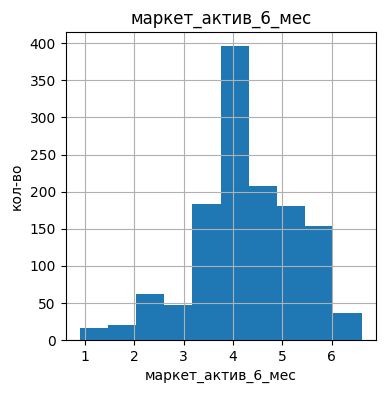

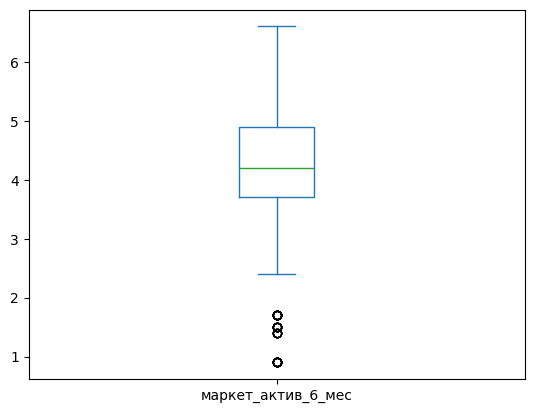

count   1,300.000
mean        4.012
std         0.697
min         3.000
25%         4.000
50%         4.000
75%         4.000
max         5.000
Name: маркет_актив_тек_мес, dtype: float64

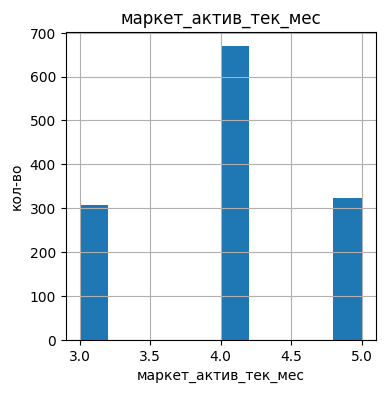

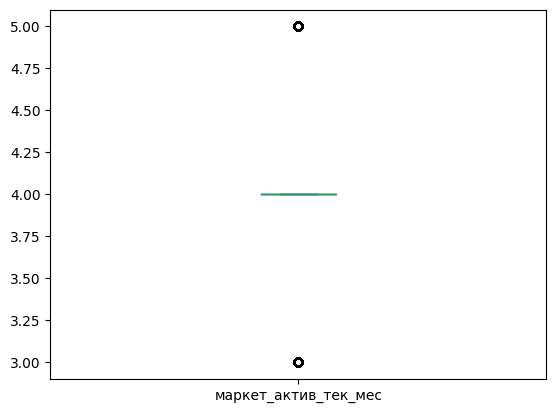

count   1,300.000
mean      601.898
std       249.856
min       110.000
25%       405.500
50%       606.000
75%       806.000
max     1,079.000
Name: длительность, dtype: float64

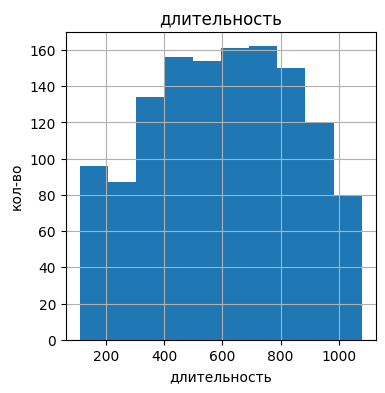

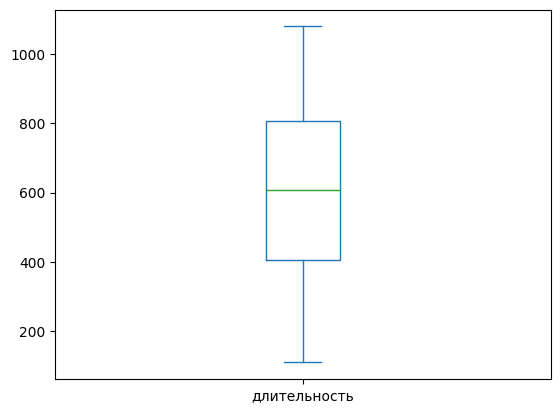

count   1,300.000
mean        0.320
std         0.250
min         0.000
25%         0.170
50%         0.240
75%         0.300
max         0.990
Name: акционные_покупки, dtype: float64

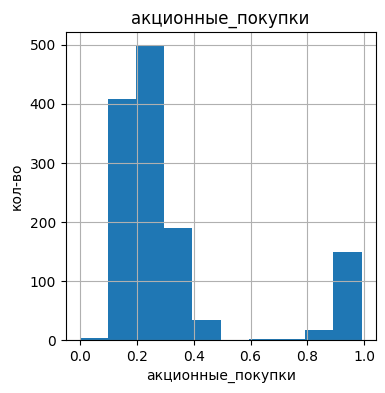

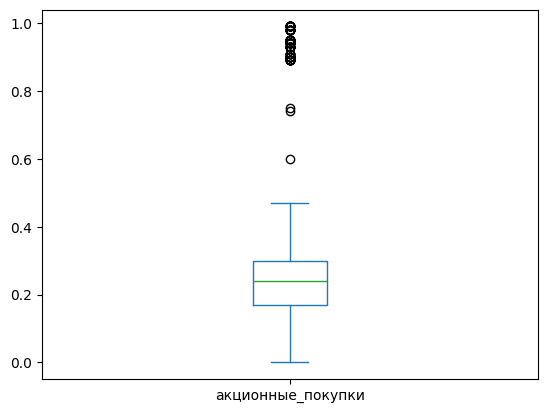

count   1,300.000
mean        3.270
std         1.355
min         1.000
25%         2.000
50%         3.000
75%         4.000
max         6.000
Name: средний_просмотр_категорий_за_визит, dtype: float64

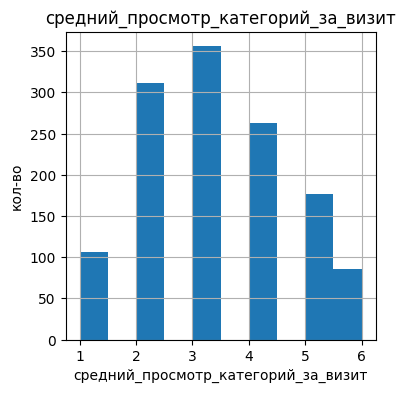

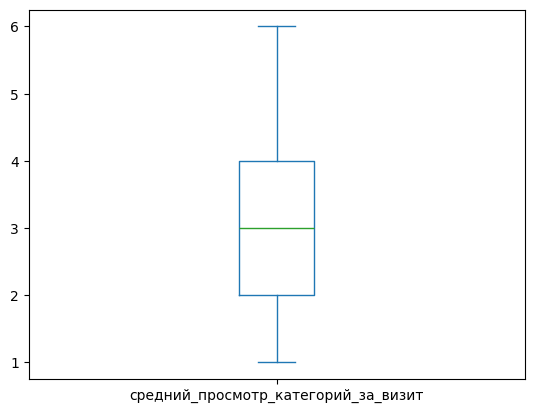

count   1,300.000
mean        2.840
std         1.971
min         0.000
25%         1.000
50%         3.000
75%         4.000
max        10.000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

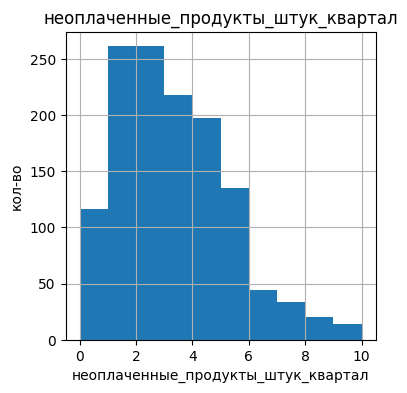

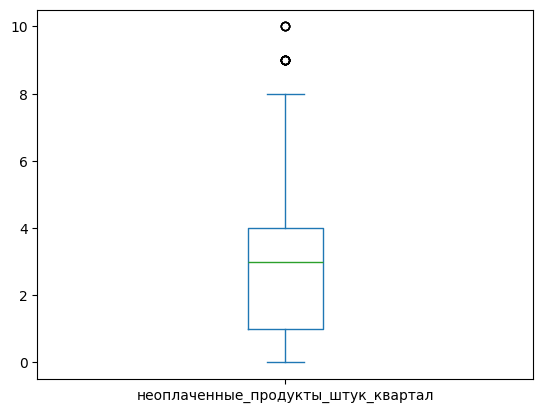

count   1,300.000
mean        4.185
std         1.955
min         0.000
25%         3.000
50%         4.000
75%         6.000
max         9.000
Name: ошибка_сервиса, dtype: float64

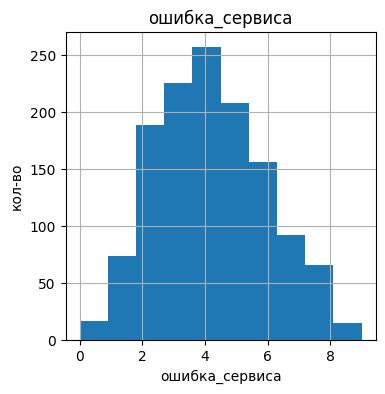

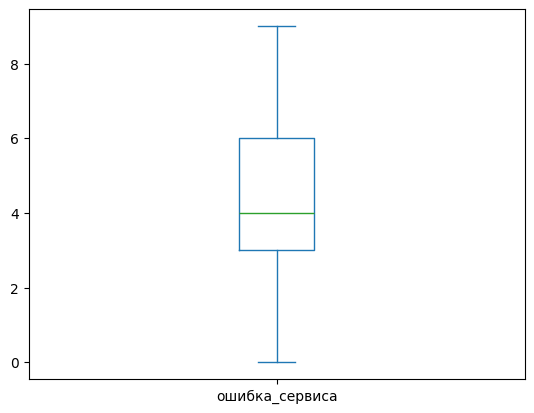

count   1,300.000
mean        8.177
std         3.978
min         1.000
25%         5.000
50%         8.000
75%        11.000
max        20.000
Name: страниц_за_визит, dtype: float64

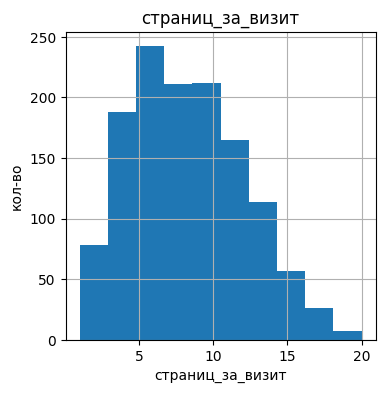

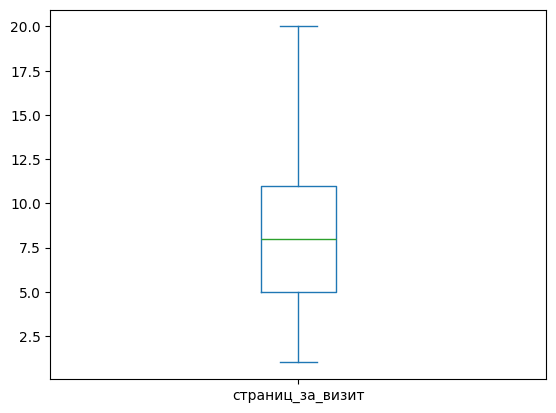

In [21]:
# количественные признаки

n_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','акционные_покупки',
       'средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит']
for n in n_columns:
    display(df_market[n].describe())
    df_market[n].hist(figsize=(4,4))
    plt.ylabel('кол-во')
    plt.xlabel(n)
    plt.title(n)
    plt.show()
    df_market[n].plot.box()
    plt.show()

In [22]:
# статистика по датафрейму df_money


display('DataFrame_money:')
display(df_money.shape)
display(df_money.columns)
display(df_money.head())
display(df_money.describe())

'DataFrame_money:'

(3900, 3)

Index(['id', 'период', 'выручка'], dtype='object')

id               период   выручка
0  215348  препредыдущий_месяц     0.000
1  215348        текущий_месяц 3,293.100
2  215348     предыдущий_месяц     0.000
3  215349  препредыдущий_месяц 4,472.000
4  215349        текущий_месяц 4,971.600

id     выручка
count   3,900.000   3,900.000
mean  215,997.500   5,025.696
std       375.326   1,777.704
min   215,348.000       0.000
25%   215,672.750   4,590.150
50%   215,997.500   4,957.500
75%   216,322.250   5,363.000
max   216,647.000 106,862.200

In [23]:
# распределение выручки по периодам в датафрейме df_money


display(df_money.pivot_table(index='период', values='выручка', aggfunc=['count','sum']))

count           sum
                    выручка       выручка
период                                   
предыдущий_месяц       1300 6,417,996.500
препредыдущий_месяц    1300 6,272,769.000
текущий_месяц          1300 6,909,449.100

In [24]:
# крайние показатели в столбце "выручка" в датафрейме df_money

display('Аномально высокая выручка:', df_money[df_money['выручка']>8000].head())
display('Кол-во покупателей с нулевой выручкой:', df_money['выручка'][df_money['выручка']<10].count())
display('Покупатели с нулевой выручкой:', df_money[df_money['выручка']<10].head(10))

'Аномально высокая выручка:'

id         период     выручка
98  215380  текущий_месяц 106,862.200

'Кол-во покупателей с нулевой выручкой:'

np.int64(6)

'Покупатели с нулевой выручкой:'

id               период  выручка
0   215348  препредыдущий_месяц    0.000
2   215348     предыдущий_месяц    0.000
28  215357  препредыдущий_месяц    0.000
29  215357     предыдущий_месяц    0.000
34  215359     предыдущий_месяц    0.000
35  215359  препредыдущий_месяц    0.000

In [25]:
# статистика по ID с анамальной выручкой

display(df_money[df_money['id']==215380])
display(df_market[df_market['id']==215380])

id               период     выручка
96  215380  препредыдущий_месяц   5,051.000
97  215380     предыдущий_месяц   6,077.000
98  215380        текущий_месяц 106,862.200

id покупательская_активность тип_сервиса разрешить_сообщать  \
32  215380                 Снизилась     премиум                нет   

    маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
32               1.700                     4           637              0.940   

              популярная_категория  средний_просмотр_категорий_за_визит  \
32  Техника для красоты и здоровья                                    3   

    неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
32                                   2               4                 7

count   3,899.000
mean    4,999.577
std       707.000
min         0.000
25%     4,590.100
50%     4,957.000
75%     5,363.000
max     7,799.400
Name: выручка, dtype: float64

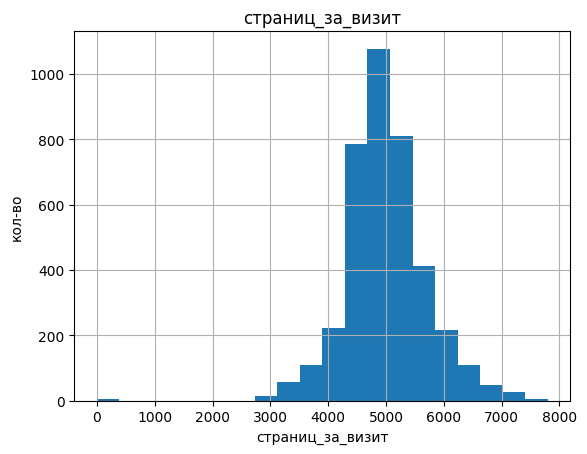

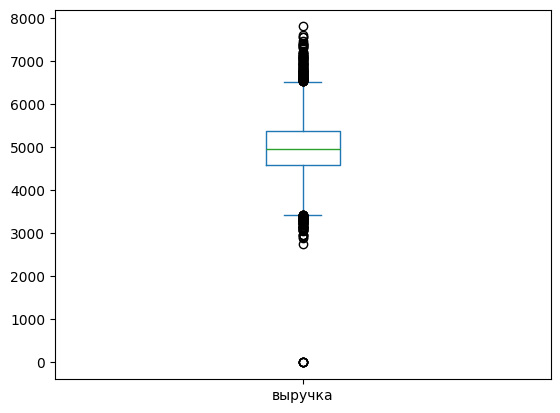

In [26]:
# гистограмма выручки без аномального показателя в 106.7 тыс. в датафрейме df_money


display(df_money['выручка'][df_money['выручка']<20000].describe())

df_money['выручка'][df_money['выручка']<8000].hist(bins=20)
plt.ylabel('кол-во')
plt.xlabel(n)
plt.title(n)
plt.show()
df_money['выручка'][df_money['выручка']<8000].plot.box()
plt.show()

count   3,893.000
mean    5,007.283
std       679.725
min     2,758.700
25%     4,592.000
50%     4,959.000
75%     5,363.000
max     7,799.400
Name: выручка, dtype: float64

(3893, 3)

count           sum
                    выручка       выручка
период                                   
предыдущий_месяц       1297 6,417,996.500
препредыдущий_месяц    1297 6,272,769.000
текущий_месяц          1299 6,802,586.900

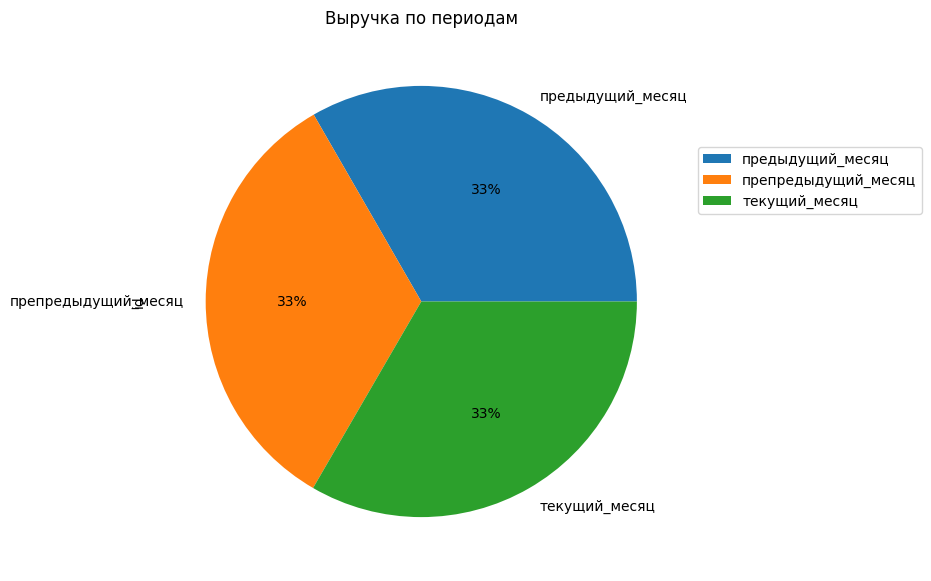

In [27]:
# удалим позиции с выручкой равной нулю и больше 10'000 в датафрейме df_money


#df_money = df_money.drop([0, 2, 28, 29, 34, 35])
#display(df_money.shape)

df_money = df_money[(df_money['выручка']<10000)&(df_money['выручка']>0)]

display(df_money['выручка'].describe())
display(df_money.shape)

# выведем обновленный результат

display(df_money.pivot_table(index='период', values='выручка', aggfunc=['count','sum']))


df_money.pivot_table(index='период', values='id',aggfunc='count').plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7))

plt.title('Выручка по периодам')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show()

In [28]:
# статистика по датафрейму df_time


display('DataFrame_time:')
display(df_time.shape)
display(df_time.columns)
display(df_time.head())
display(df_time.describe())

'DataFrame_time:'

(2600, 3)

Index(['id', 'период', 'минут'], dtype='object')

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдущий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдущий_месяц     12
4  215350     текущий_месяц     13

id     минут
count   2,600.000 2,600.000
mean  215,997.500    13.336
std       375.350     4.080
min   215,348.000     4.000
25%   215,672.750    10.000
50%   215,997.500    13.000
75%   216,322.250    16.000
max   216,647.000    23.000

count    sum
                 минут  минут
период                       
предыдущий_месяц  1300  17508
текущий_месяц     1300  17166

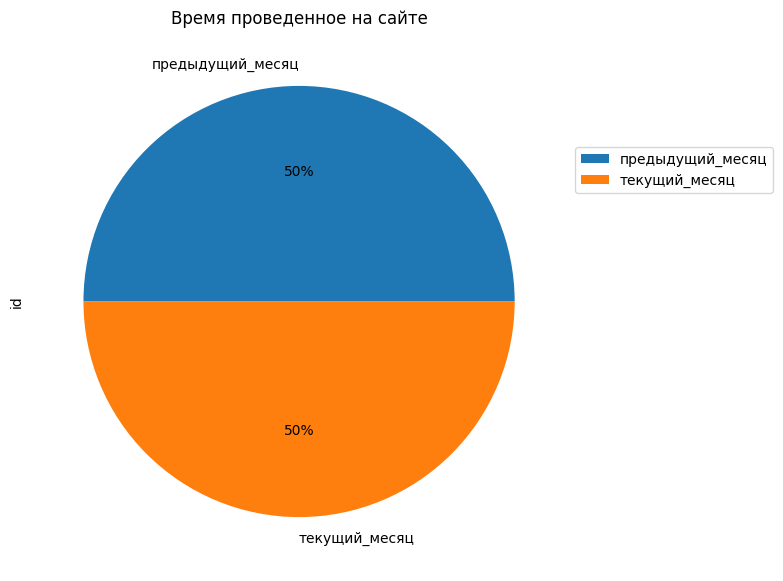

In [29]:
# распределение времени по периодам в датафрейме df_time


display(df_time.pivot_table(index='период', values='минут', aggfunc=['count','sum']))
df_time.pivot_table(index='период', values='id',aggfunc='count').plot.pie(y='id', autopct='%1.0f%%', figsize=(10,7))
plt.title('Время проведенное на сайте')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show()

count   2,600.000
mean       13.336
std         4.080
min         4.000
25%        10.000
50%        13.000
75%        16.000
max        23.000
Name: минут, dtype: float64

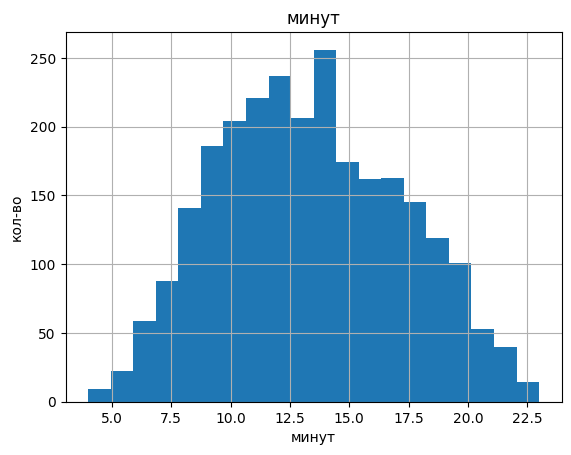

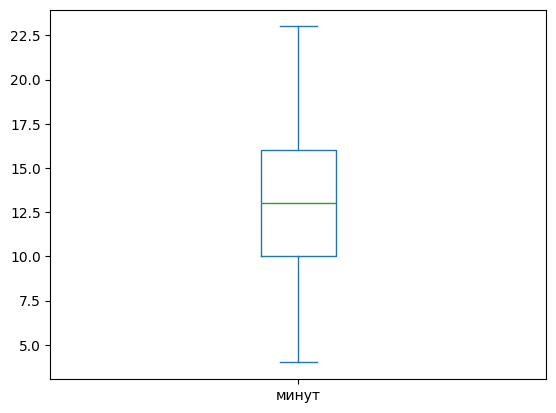

In [30]:
# гистограмма "минут" в датафрейме df_time


display(df_time['минут'].describe())

df_time['минут'].hist(bins=20)
plt.ylabel('кол-во')
plt.xlabel('минут')
plt.title('минут')
plt.show()
df_time['минут'].plot.box()
plt.show()

In [31]:
# статистика по датафрейму df_income


display('DataFrame_time:')
display(df_income.shape)
display(df_income.columns)
display(df_income.head())
display(df_income.describe())

'DataFrame_time:'

(1300, 2)

Index(['id', 'прибыль'], dtype='object')

id  прибыль
0  215348    0.980
1  215349    4.160
2  215350    3.130
3  215351    4.870
4  215352    4.210

id   прибыль
count   1,300.000 1,300.000
mean  215,997.500     3.997
std       375.422     1.014
min   215,348.000     0.860
25%   215,672.750     3.300
50%   215,997.500     4.045
75%   216,322.250     4.670
max   216,647.000     7.430

count   1,300.000
mean        3.997
std         1.014
min         0.860
25%         3.300
50%         4.045
75%         4.670
max         7.430
Name: прибыль, dtype: float64

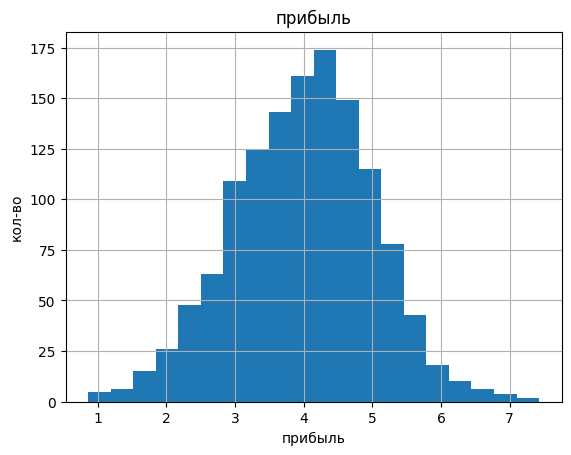

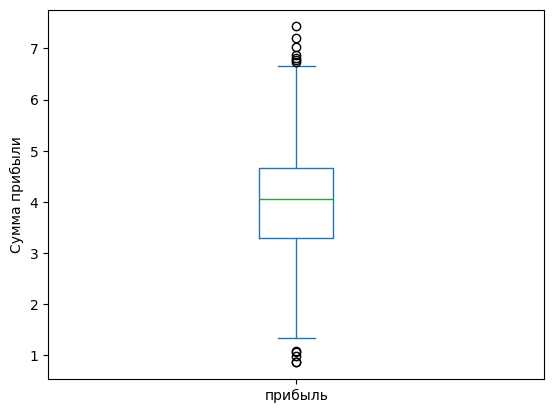

In [32]:
# гистограмма "минут" в датафрейме df_income


display(df_income['прибыль'].describe())

df_income['прибыль'].hist(bins=20)
plt.ylabel('кол-во')
plt.xlabel('прибыль')
plt.title('прибыль')
plt.show()
df_income['прибыль'].plot.box()
plt.ylabel('Сумма прибыли')
plt.show()

Наблюдается дисбаланс классов у целевого признака "покупательская_активность", распределение 62% - "прежний уровень" и 38% - "снизилось". Большинство пользователей пользуются стандартным сервисом - 924 пользователя vs 376 пользователей - "премиум". Самая популярная категория товаров - товары для детей: 25%, на втором месте: домашний текстиль - 19%. Время поверенное пользователями на сайте в прошлом и текущем месяцах одинаковое.
Замечена аномально высокая выручка в размере 106,862.200 условных единиц (размерность не известна), выбивается из общей картины и выручка равная нулю. Такие позиции исключены из датафрейма. Выручка по периодам распределяется равномерно.

Распределения признаков в разрезе целевого признака (снижения активности).

'Общая покупательская способность'

покупательская_активность
популярная_категория                                           
Домашний текстиль                                           251
Косметика и аксесуары                                       223
Кухонная посуда                                             138
Мелкая бытовая техника и электроника                        174
Техника для красоты и здоровья                              184
Товары для детей                                            330

'Покупательская способность, целевого признака (снижения активности)'

id
популярная_категория                     
Домашний текстиль                     102
Косметика и аксесуары                 105
Кухонная посуда                        66
Мелкая бытовая техника и электроника   27
Техника для красоты и здоровья         52
Товары для детей                      146

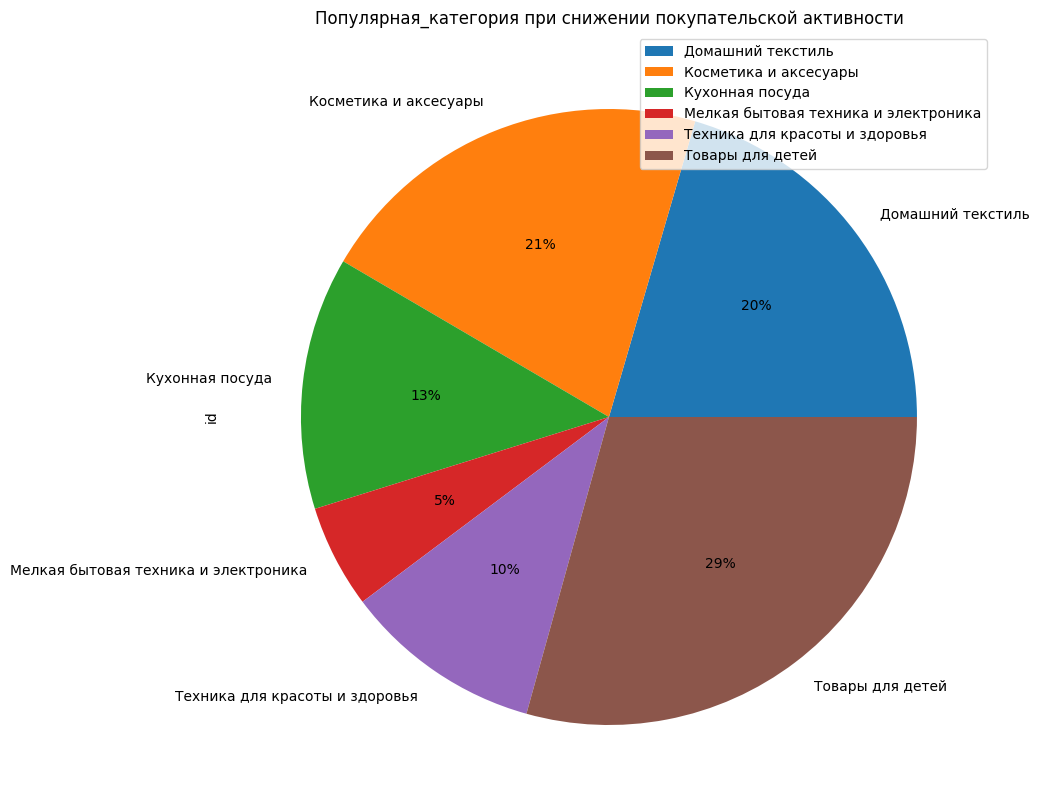

In [33]:
# признак "Покупательская способность" vs "популярная_категория"


display('Общая покупательская способность', df_market.pivot_table(index='популярная_категория',
                                                                  values='покупательская_активность',
                                                                  aggfunc='count'))
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась'].pivot_table(
    index='популярная_категория',
    values='id',aggfunc='count'))

df_market[df_market['покупательская_активность']=='Снизилась'].pivot_table(
    index='популярная_категория',
    values='id',aggfunc='count').plot.pie(y='id',
                                          autopct='%1.0f%%',
                                          figsize=(10,10))

plt.title('Популярная_категория при снижении покупательской активности')
plt.show()

In [34]:
# диаграмма признака "Покупательская способность" vs "популярная_категория"


px.histogram(df_market, x = 'популярная_категория', color = 'покупательская_активность', nbins = 10)

38% (498 id vs 1300 id) пользователей подпадают под категорию снижение покупательской активности. Наибольшее снижение наблюдается в категориях: товары для дома, косметика и аксессуары, домашний текстиль.

In [35]:
# признак "Покупательская способность" vs "ошибка_сервиса"


display('Общая покупательская способность', df_market.pivot_table(index='ошибка_сервиса',
                                                                  values='покупательская_активность',
                                                                  aggfunc='count'))
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась'].pivot_table(
    index='ошибка_сервиса',
    values='id',aggfunc='count'))

'Общая покупательская способность'

покупательская_активность
ошибка_сервиса                           
0                                      17
1                                      74
2                                     189
3                                     226
4                                     257
5                                     208
6                                     156
7                                      92
8                                      66
9                                      15

'Покупательская способность, целевого признака (снижения активности)'

id
ошибка_сервиса     
1                32
2                96
3               106
4                94
5                65
6                43
7                36
8                23
9                 3

In [36]:
# диаграмма признака "Покупательская способность" vs "ошибка_сервиса"


px.histogram(df_market, x = 'ошибка_сервиса', color = 'покупательская_активность', nbins = 10)

У пользователей подпадающих под категорию снижение активности наблюдается следующая корреляция с кол-ом ошибок:
* 0 ошибок - 0%    (0 id vs 17  id) пользователей со сниженной покупательской способностью нет в данной кагорте;
* 1 ошибки = 43%  (32 id vs 74  id) пользователей с категорией "Cнизилась" от общего числа пользователей с кол-ом ошибок: 1;
* 2 ошибки = 51%  (96 id vs 189 id) пользователей с категорией "Cнизилась" от общего числа пользователей с кол-ом ошибок: 2;
* 3 ошибки = 47% (106 id vs 226 id) пользователей с категорией "Cнизилась" от общего числа пользователей с кол-ом ошибок: 3;
* 4 и более ошибок - соотношение категорий "Cнизилась" vs общее число снижается.
Согласно диаграмме соотношения признаков "Покупательская способность" vs "ошибка_сервиса" можно предположить, что ошибки сервиса в кол-ве 1-3 ошибки отталкивают покупателя и он меньше обращается к сервису.

In [37]:
# признак "Покупательская способность" vs "неоплаченные_продукты_штук_квартал"


display('Общая покупательская способность', df_market.pivot_table(index='неоплаченные_продукты_штук_квартал',
                                                                  values='покупательская_активность',
                                                                  aggfunc='count'))
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась'].pivot_table(
    index='неоплаченные_продукты_штук_квартал',
    values='id',aggfunc='count'))

'Общая покупательская способность'

покупательская_активность
неоплаченные_продукты_штук_квартал                           
0                                                         116
1                                                         261
2                                                         261
3                                                         218
4                                                         197
5                                                         135
6                                                          44
7                                                          34
8                                                          20
9                                                          10
10                                                          4

'Покупательская способность, целевого признака (снижения активности)'

id
неоплаченные_продукты_штук_квартал    
0                                   29
1                                   61
2                                   83
3                                   73
4                                   75
5                                   71
6                                   41
7                                   32
8                                   19
9                                   10
10                                   4

In [38]:
# диаграмма признака "Покупательская способность" vs "неоплаченные_продукты_штук_квартал"


px.histogram(df_market, x = 'неоплаченные_продукты_штук_квартал', color = 'покупательская_активность', nbins = 10)

Категория клиентов, у которых в корзине отложено 5 единиц и более составляют пользователи со сниженной активностью.
* 5 единиц - 53% (71 id vs 135 id) пользователей со сниженной активностью от общего числа пользователей в данной кагорте.
* 6 единиц - 93% (41 id vs 44 id) пользователей со сниженной активностью от общего числа пользователей в данной кагорте.

In [39]:
# диаграмма признака "Покупательская способность" vs "длительность"


px.histogram(df_market, x = 'длительность', color = 'покупательская_активность', nbins = 10)

In [40]:
# признак "Покупательская способность" vs "длительность"


display('Общая покупательская способность', df_market['длительность'].describe())
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась']['длительность'].describe())

'Общая покупательская способность'

count   1,300.000
mean      601.898
std       249.856
min       110.000
25%       405.500
50%       606.000
75%       806.000
max     1,079.000
Name: длительность, dtype: float64

'Покупательская способность, целевого признака (снижения активности)'

count     498.000
mean      619.884
std       239.941
min       110.000
25%       449.000
50%       634.500
75%       811.000
max     1,079.000
Name: длительность, dtype: float64

Кол-во дней прошедшее с момента регистрации покупателя на сайте не влияет на статус его покупательской активности. Скорее косвенно мы можем предположить, что покупательская активность снижается у "длительных" пользователей, т.к. медианной значение и третий квантиль выше у пользователей с низкой активностью.

In [41]:
# диаграмма признака "Покупательская способность" vs "страниц_за_визит"


px.histogram(df_market, x = 'страниц_за_визит', color = 'покупательская_активность', nbins = 10)

In [42]:
# признак "Покупательская способность" vs "страниц_за_визит"


display('Общая покупательская способность', df_market['страниц_за_визит'].describe())
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась']['страниц_за_визит'].describe())

'Общая покупательская способность'

count   1,300.000
mean        8.177
std         3.978
min         1.000
25%         5.000
50%         8.000
75%        11.000
max        20.000
Name: страниц_за_визит, dtype: float64

'Покупательская способность, целевого признака (снижения активности)'

count   498.000
mean      5.568
std       3.454
min       1.000
25%       3.000
50%       5.000
75%       7.000
max      18.000
Name: страниц_за_визит, dtype: float64

Клиенты с низкой покупательской способнотью меньше посещают страниц сервиса за один визит, среднее значение кол-ва визитов у них ниже на 33% от всех пользователей.

In [43]:
# диаграмма признака "Покупательская способность" vs "акционные_покупки"


px.histogram(df_market, x = 'акционные_покупки', color = 'покупательская_активность', nbins = 10)

In [44]:
# признак "Покупательская способность" vs "акционные_покупки"


display('Общая покупательская способность', df_market['акционные_покупки'].describe())
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась']['акционные_покупки'].describe())

'Общая покупательская способность'

count   1,300.000
mean        0.320
std         0.250
min         0.000
25%         0.170
50%         0.240
75%         0.300
max         0.990
Name: акционные_покупки, dtype: float64

'Покупательская способность, целевого признака (снижения активности)'

count   498.000
mean      0.451
std       0.306
min       0.000
25%       0.240
50%       0.310
75%       0.890
max       0.990
Name: акционные_покупки, dtype: float64

Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев у покупателей с уровня активности: «снизилась» выше, чем у другой кагорты покупателей. Можно предположить, что понравившийся продукт клиенты со сниженной покупательской активностью откладывают в корзину и ждут акций.

In [45]:
# диаграмма признака "Покупательская способность" vs "маркет_актив_6_мес"


px.histogram(df_market, x = 'маркет_актив_6_мес', color = 'покупательская_активность', nbins = 10)

In [46]:
# признак "Покупательская способность" vs "маркет_актив_6_мес"


display('Общая покупательская способность', df_market['маркет_актив_6_мес'].describe())
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась']['маркет_актив_6_мес'].describe())

'Общая покупательская способность'

count   1,300.000
mean        4.254
std         1.015
min         0.900
25%         3.700
50%         4.200
75%         4.900
max         6.600
Name: маркет_актив_6_мес, dtype: float64

'Покупательская способность, целевого признака (снижения активности)'

count   498.000
mean      3.744
std       1.053
min       0.900
25%       3.100
50%       3.900
75%       4.400
max       6.600
Name: маркет_актив_6_мес, dtype: float64

In [47]:
# диаграмма признака "Покупательская способность" vs "маркет_актив_тек_мес"


px.histogram(df_market, x = 'маркет_актив_тек_мес', color = 'покупательская_активность', nbins = 10)

In [48]:
# признак "Покупательская способность" vs "маркет_актив_тек_мес"


display('Общая покупательская способность', df_market['маркет_актив_тек_мес'].describe())
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась']['маркет_актив_тек_мес'].describe())

'Общая покупательская способность'

count   1,300.000
mean        4.012
std         0.697
min         3.000
25%         4.000
50%         4.000
75%         4.000
max         5.000
Name: маркет_актив_тек_мес, dtype: float64

'Покупательская способность, целевого признака (снижения активности)'

count   498.000
mean      4.012
std       0.709
min       3.000
25%       4.000
50%       4.000
75%       5.000
max       5.000
Name: маркет_актив_тек_мес, dtype: float64

Согласно данным, можно предположить, что маркетинговая активность никак не таргетируется по портретам пользователей, а проводится сплошником по всем клиентам.

In [49]:
# диаграмма признака "Покупательская способность" vs "тип_сервиса"


px.histogram(df_market, x = 'тип_сервиса', color = 'покупательская_активность', nbins = 10)

In [50]:
# признак "Покупательская способность" vs "тип_сервиса"


display('Общая покупательская способность', df_market.pivot_table(index='тип_сервиса',
                                                                  values='покупательская_активность',
                                                                  aggfunc='count'))
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась'].pivot_table(
    index='тип_сервиса',
    values='id',aggfunc='count'))

'Общая покупательская способность'

покупательская_активность
тип_сервиса                           
премиум                            376
стандарт                           924

'Покупательская способность, целевого признака (снижения активности)'

id
тип_сервиса     
премиум      170
стандарт     328

Тип сервиса распределяется между категориями "Снизилась" и "Прежний уровень" активности плюс/минус равномерно. В разделе премиум чуть больше доля клиентов (на 10 пунктов) со сниженной активностью, чем эта же кагорта с пакетом стандарт. Т.к. мы не знаем в чем разница между типами сервиса, можно предположить, что тип зависит от длительности прибывания на сервисе.

In [51]:
# диаграмма признака "Покупательская способность" vs "средний_просмотр_категорий_за_визит"


px.histogram(df_market, x = 'средний_просмотр_категорий_за_визит', color = 'покупательская_активность', nbins = 10)

In [52]:
# признак "Покупательская способность" vs "средний_просмотр_категорий_за_визит"


display('Общая покупательская способность', df_market.pivot_table(index='средний_просмотр_категорий_за_визит',
                                                                  values='покупательская_активность',
                                                                  aggfunc='count'))
display('Покупательская способность, целевого признака (снижения активности)',
        df_market[df_market['покупательская_активность']=='Снизилась'].pivot_table(
    index='средний_просмотр_категорий_за_визит',
    values='id',aggfunc='count'))

'Общая покупательская способность'

покупательская_активность
средний_просмотр_категорий_за_визит                           
1                                                          106
2                                                          312
3                                                          356
4                                                          263
5                                                          177
6                                                           86

'Покупательская способность, целевого признака (снижения активности)'

id
средний_просмотр_категорий_за_визит     
1                                     84
2                                    176
3                                    134
4                                     63
5                                     25
6                                     16

Покупатели со сниженной активностью в среднем просматривают от 1-3 категории товаров и самая популярное - две категории, а покупатели со статусом "прежний уровень" просматривают 2-4 категории и самое популярное - три категории.

<div class="alert alert-info">
38% (498 id vs 1300 id) пользователей подпадают под категорию снижение покупательской активности. Наибольшее снижение активности у данной кагорты наблюдается в категориях: товары для дома, косметика и аксессуары, домашний текстиль.
Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев у покупателей с уровня активности: «снизилась» выше, чем у другой кагорты покупателей. Можно предположить, что понравившийся продукт клиенты со сниженной покупательской активностью откладывают в корзину и ждут акций. В средним они просматривают от одной до трех категорий товара за визит, что ниже, чем у другой кагорты.   
Согласно данным, можно предположить, что маркетинговая активность никак не таргетируется по портретам пользователей, а проводится сплошником по всем клиентам.
У пользователей подпадающих под категорию снижение активности наблюдается следующая корреляция с кол-ом ошибок:
* 0 ошибок - 0%    (0 id vs 17  id) пользователей со сниженной покупательской способностью нет в данной кагорте;
* 1 ошибки = 43%  (32 id vs 74  id) пользователей с категорией "Cнизилась" от общего числа пользователей с кол-ом ошибок: 1;
* 2 ошибки = 51%  (96 id vs 189 id) пользователей с категорией "Cнизилась" от общего числа пользователей с кол-ом ошибок: 2;
* 3 ошибки = 47% (106 id vs 226 id) пользователей с категорией "Cнизилась" от общего числа пользователей с кол-ом ошибок: 3;
* 4 и более ошибок - соотношение категорий "Cнизилась" vs общее число снижается.
Согласно диаграмме соотношения признаков "Покупательская способность" vs "ошибка_сервиса" можно предположить, что ошибки сервиса в кол-ве 1-3 ошибки отталкивают покупателя и он меньше обращается к сервису.

## Объединение таблиц

Объединим три датафрейма: df_market, df_money, df_time в один. Предварительно перегруппируем датафреймы df_money, df_time по столбцу ID.  

In [53]:
# перегруппировываем датафрейм df_time по ID в размерность 1300 уникальных пользователей


time_1 = df_time[df_time['период']=='предыдущий_месяц'].copy()
time_1.rename(columns={'минут':'минут_предыдущего_месяца'},inplace=True)
time_1.drop('период', axis= 1 , inplace= True )

time_2 = df_time[df_time['период']=='текущий_месяц'].copy()
time_2.rename(columns={'минут':'минут_текущего_месяца'},inplace=True)
time_2.drop('период', axis= 1 , inplace= True )

df_time = pd.merge(time_1, time_2, on='id', sort=True)

display(df_time.shape)
display(df_time.info())
display(df_time.head())

(1300, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1300 non-null   int64
 1   минут_предыдущего_месяца  1300 non-null   int64
 2   минут_текущего_месяца     1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


None

id  минут_предыдущего_месяца  минут_текущего_месяца
0  215348                        13                     14
1  215349                        12                     10
2  215350                         8                     13
3  215351                        11                     13
4  215352                         8                     11

In [54]:
## перегруппировываем датафрейм df_money по ID в размерность 1300 уникальных пользователей


money_1 = df_money[df_money['период']=='текущий_месяц'].copy()
money_1.rename(columns={'выручка':'выручка_предыдущего_месяца'},inplace=True)
money_1.drop('период', axis= 1 , inplace= True )

money_2 = df_money[df_money['период']=='предыдущий_месяц'].copy()
money_2.rename(columns={'выручка':'выручка_текущего_месяца'},inplace=True)
money_2.drop('период', axis= 1 , inplace= True )

money_3 = df_money[df_money['период']=='препредыдущий_месяц'].copy()
money_3.rename(columns={'выручка':'выручка_препредыдущего_месяца'},inplace=True)
money_3.drop('период', axis= 1 , inplace= True )

df_money = pd.merge(money_1, money_2, on='id', sort=True)
df_money = pd.merge(money_3, df_money, on='id', sort=True)
display(df_money.info())
display(df_money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1296 non-null   int64  
 1   выручка_препредыдущего_месяца  1296 non-null   float64
 2   выручка_предыдущего_месяца     1296 non-null   float64
 3   выручка_текущего_месяца        1296 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.6 KB


None

id  выручка_препредыдущего_месяца  выручка_предыдущего_месяца  \
0  215349                      4,472.000                   4,971.600   
1  215350                      4,826.000                   5,058.400   
2  215351                      4,793.000                   6,610.400   
3  215352                      4,594.000                   5,872.500   
4  215353                      5,124.000                   5,388.500   

   выручка_текущего_месяца  
0                5,216.000  
1                5,457.500  
2                6,158.000  
3                5,807.500  
4                4,738.500

In [55]:
# об'единяем три файла в один


df = pd.merge(df_money, pd.merge(df_time, df_market, on='id', sort=True), on='id', sort=True)
display('Размерность датафрейма', df.shape)
display(df.info())
display('Кол-во явных дубликатов', df.duplicated().sum())
display('Кол-во пропусков', df.isna().sum())
display(df.head())

'Размерность датафрейма'

(1296, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_препредыдущего_месяца        1296 non-null   float64
 2   выручка_предыдущего_месяца           1296 non-null   float64
 3   выручка_текущего_месяца              1296 non-null   float64
 4   минут_предыдущего_месяца             1296 non-null   int64  
 5   минут_текущего_месяца                1296 non-null   int64  
 6   покупательская_активность            1296 non-null   object 
 7   тип_сервиса                          1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

None

'Кол-во явных дубликатов'

np.int64(0)

'Кол-во пропусков'

id                                     0
выручка_препредыдущего_месяца          0
выручка_предыдущего_месяца             0
выручка_текущего_месяца                0
минут_предыдущего_месяца               0
минут_текущего_месяца                  0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

id  выручка_препредыдущего_месяца  выручка_предыдущего_месяца  \
0  215349                      4,472.000                   4,971.600   
1  215350                      4,826.000                   5,058.400   
2  215351                      4,793.000                   6,610.400   
3  215352                      4,594.000                   5,872.500   
4  215353                      5,124.000                   5,388.500   

   выручка_текущего_месяца  минут_предыдущего_месяца  минут_текущего_месяца  \
0                5,216.000                        12                     10   
1                5,457.500                         8                     13   
2                6,158.000                        11                     13   
3                5,807.500                         8                     11   
4                4,738.500                        10                     10   

  покупательская_активность тип_сервиса разрешить_сообщать  \
0                 Снизилась     премиум                 да   
1                 Снизилась    стандарт                нет   
2                 Снизилась    стандарт                 да   
3                 Снизилась    стандарт                нет   
4                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0               4.400                     4           819              0.750   
1               4.900                     3           539              0.140   
2               3.200                     5           896              0.990   
3               5.100                     3          1064              0.940   
4               3.300                     4           762              0.260   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   4               2                 5  
1                                   2               1                 5  
2                                   0               6                 4  
3                                   2               3                 2  
4                                   1               1                 4

Три датафрейма: df_market, df_money, df_time об'единены в один общий. Якорным столбцом служил "id". Размерность единого датафрема - 1297 уникальных строк и 18 столбцов. Датафрейм проверен на явные дубликаты и пропуски. Приступаем к корреляционному анализу.

## Корреляционный анализ

In [56]:
# устанавливаем индекс в едином датафрейме


df = df.sort_values(by=['id']).set_index('id')

ValueError: could not convert string to float: 'Снизилась'

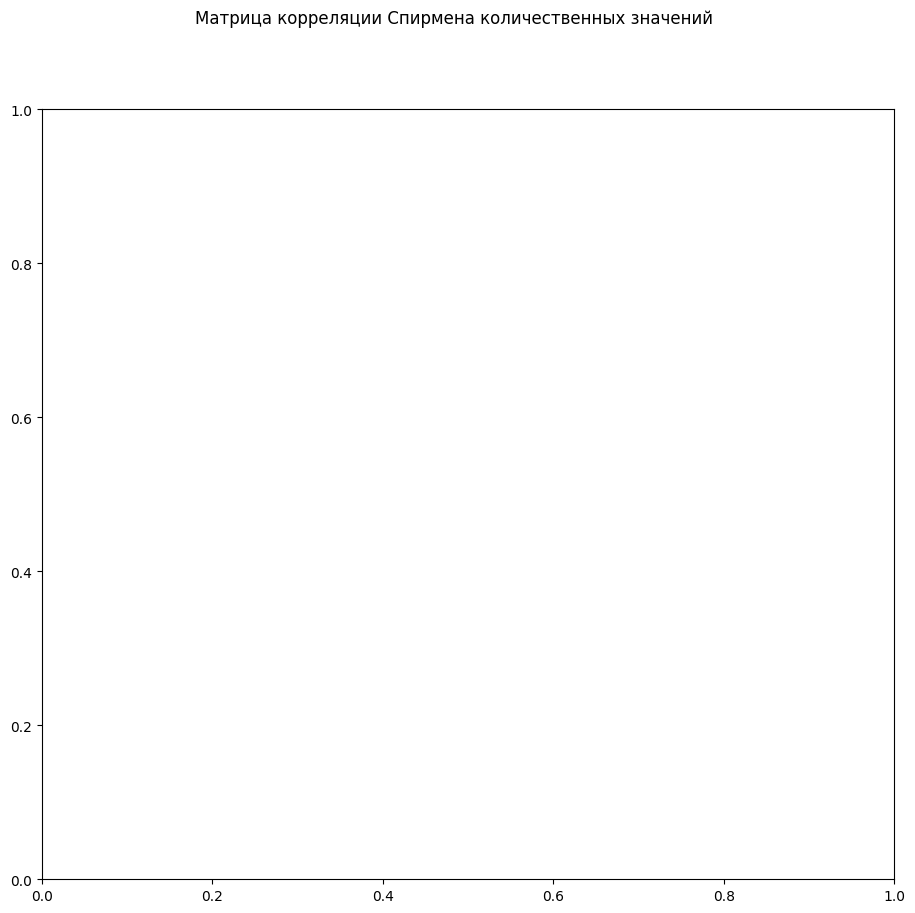

In [58]:
# построим матрицу корреляции Спирмена

fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции Спирмена количественных значений')
sns.heatmap(df.corr(method="spearman"), annot=True, cmap='PuBuGn');


Высокая корреляция между признаками "выручка предыдущего месяца" и "выручка текущего месяца".

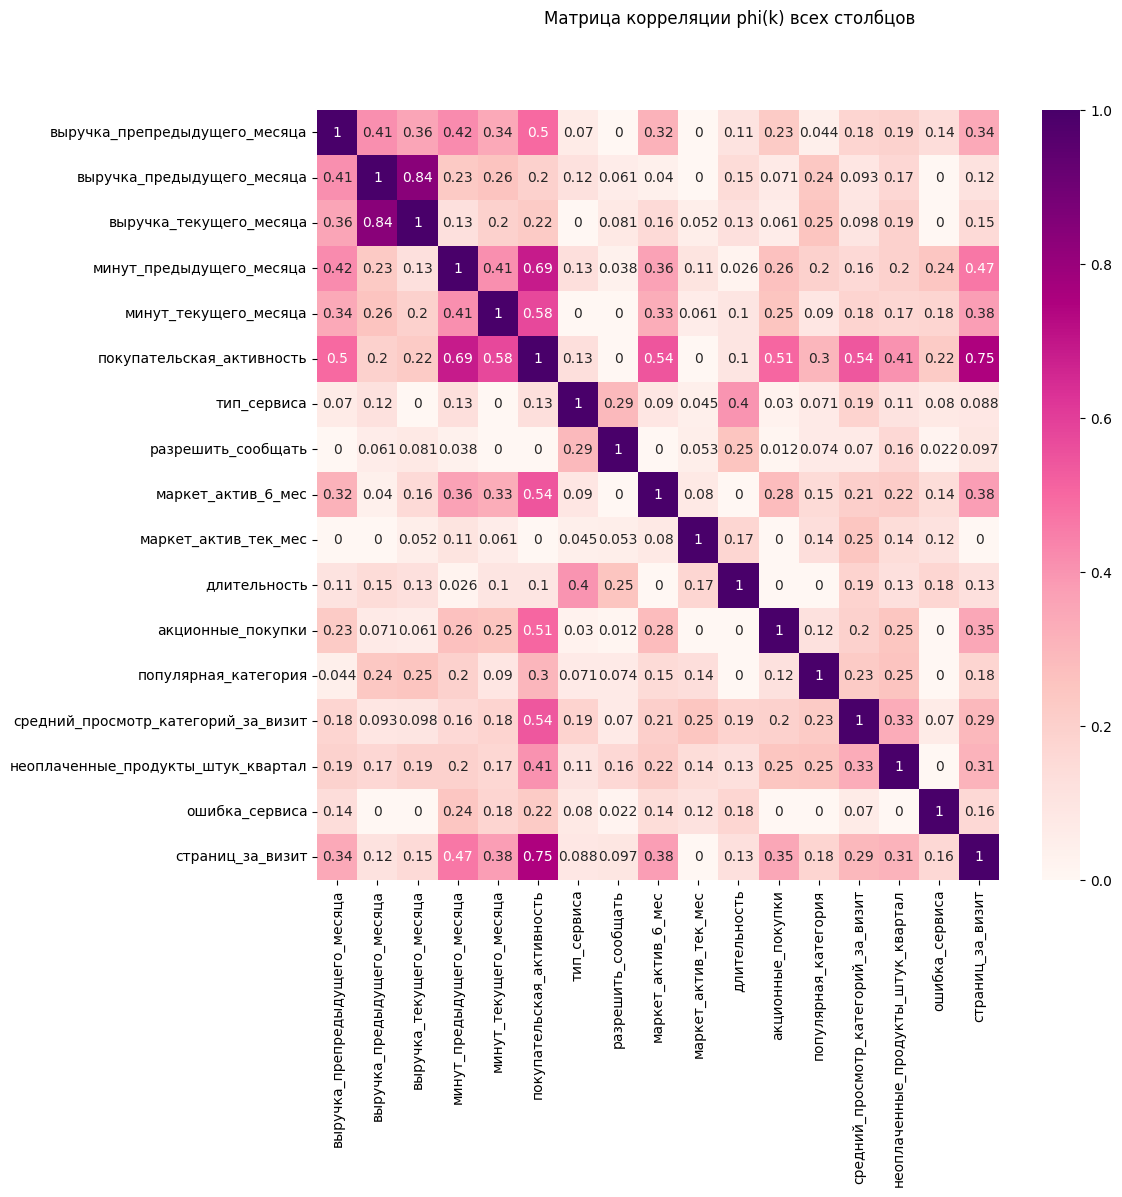

In [59]:
# построим тепловую карту для количественных признаков


interval_cols = ['выручка_препредыдущего_месяца',
                 'выручка_предыдущего_месяца',
                 'выручка_текущего_месяца',
                 'минут_предыдущего_месяца',
                 'минут_текущего_месяца',
                 'маркет_актив_6_мес',
                 'длительность',
                 'акционные_покупки'
                 ]
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции phi(k) всех столбцов')
sns.heatmap(df.phik_matrix(interval_cols=interval_cols), annot=True, cmap='RdPu');

Между входными параметрами отсутствует связь выше 0.9. Будем считать, что мультиколлинеарность отсутствует.
Максимальное значение корреляция Спирмена = 0.88 между выручками предыдущего и текущего месяцов. Данные признаки, с точки зрения логики, не должны коррелироваться между собой и влиять друг на друга.
Максимальное значение корреляция phi(k) = 0.75 между "покупательская_активность" (целевой признак) и "страниц за визит". Также показатель 0.69 и 0.58 у целевого признака с признаками "минуты предыдущего и текущего месяцов".

## Использование пайплайнов

In [60]:
# выделим целевой и входные признаки для модели


X = df.drop(['покупательская_активность'], axis=1)
y = df['покупательская_активность']

# разделим данные на тренировочную и тестовые выборки


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify = y)

display('Размерность выборок', X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# создайте экземпляр класса LabelEncoder для кодирования целевого признака

label_encoder = LabelEncoder()
label_encoder.fit_transform(y_train.unique())
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
display ('значениям', label_encoder.classes_, 'назначено', label_encoder.transform(label_encoder.classes_))

'Размерность выборок'

(972, 16)

(324, 16)

(972,)

(324,)

'значениям'

array(['Прежний уровень', 'Снизилась'], dtype=object)

'назначено'

array([0, 1])

In [61]:
# создадим скиски c категориальными признаками


ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать']


# создадим скиски с количественными признаками


num_columns = ['выручка_препредыдущего_месяца',
               'выручка_текущего_месяца',
               'минут_предыдущего_месяца',
               'минут_текущего_месяца',
               'маркет_актив_тек_мес',
               'маркет_актив_6_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
               'страниц_за_визит']

In [62]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование


ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [63]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование


ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['да', 'нет'],

                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


# создаём общий пайплайн для подготовки данных


data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [87]:
# создаём итоговый пайплайн: подготовка данных и модель


pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

param_grid = [
        # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
        # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 500),
        'models__max_features': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
        # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',penalty='l1')],
        'models__C': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
        # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'models__degree': range(1, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    }
]

# для автоматизированного поиска гиперпараметров выбираем RandomizedSearchCV

model = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
).fit(X_train, y_train)

display('Лучшая модель и её параметры:\n\n', model.best_estimator_)
display('Метрика ROC-AUC лучшей модели на кросс - валидации:', model.best_score_)

'Лучшая модель и её параметры:\n\n'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(stra...
                                                   'выручка_текущего_месяца',
                                                   'минут_предыдущего_месяца',
                                                   'минут_текущего_месяца',
                                                   'маркет_актив_тек_мес',
                                                   'маркет_актив_6_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=221, max_features=15,
                                        random_state=42))])

'Метрика ROC-AUC лучшей модели на кросс - валидации:'

np.float64(0.8182527362072817)

In [88]:
# выведем показатели перебора


display(f'Best score: {model.best_score_}, best params: {model.best_params_}')


result = pd.DataFrame(model.cv_results_)
display (result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

"Best score: 0.8182527362072817, best params: {'preprocessor__num': RobustScaler(), 'models__max_features': 15, 'models__max_depth': 221, 'models': DecisionTreeClassifier(random_state=42)}"

rank_test_score                             param_models  mean_test_score  \
5                1  DecisionTreeClassifier(random_state=42)            0.818   
3                2  DecisionTreeClassifier(random_state=42)            0.800   
4                3  DecisionTreeClassifier(random_state=42)            0.798   
0                4  DecisionTreeClassifier(random_state=42)            0.798   
8                4  DecisionTreeClassifier(random_state=42)            0.798   
1                6  DecisionTreeClassifier(random_state=42)            0.790   
6                7  DecisionTreeClassifier(random_state=42)            0.784   
9                8  DecisionTreeClassifier(random_state=42)            0.765   
7                9  DecisionTreeClassifier(random_state=42)            0.719   
2               10   SVC(probability=True, random_state=42)            0.494   

                                              params  
5  {'preprocessor__num': RobustScaler(), 'models_...  
3  {'preprocessor__num': StandardScaler(), 'model...  
4  {'preprocessor__num': MinMaxScaler(), 'models_...  
0  {'preprocessor__num': 'passthrough', 'models__...  
8  {'preprocessor__num': 'passthrough', 'models__...  
1  {'preprocessor__num': StandardScaler(), 'model...  
6  {'preprocessor__num': RobustScaler(), 'models_...  
9  {'preprocessor__num': MinMaxScaler(), 'models_...  
7  {'preprocessor__num': RobustScaler(), 'models_...  
2  {'preprocessor__num': RobustScaler(), 'models_...

In [89]:
# выводим метрики


display('Площадь ROC-кривой на кросс-валидации:', model.best_score_)
roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

display('Площадь ROC-кривой на тестовой выборке:', roc_auc_test)
roc_auc_km = (roc_auc_test - model.best_score_) / model.best_score_*100

display(f'Потеря качества на тестовой выборке  = {-roc_auc_km:.2f} %')

'Площадь ROC-кривой на кросс-валидации:'

np.float64(0.8182527362072817)

'Площадь ROC-кривой на тестовой выборке:'

0.8128867855842739

'Потеря качества на тестовой выборке  = 0.66 %'

<div class="alert alert-info">
Выбор метрики:
    
ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): Оценивает способность модели различать между классами. Он измеряет площадь под ROC-кривой, которая показывает отношение между долей верно классифицированных положительных и долей ложноположительных результатов при изменении порогового значения.
ROC-AUC: Чаще используется в задачах бинарной классификации для оценки способности модели разделять классы, независимо от баланса классов.

  0%|          | 0/324 [00:00<?, ?it/s]

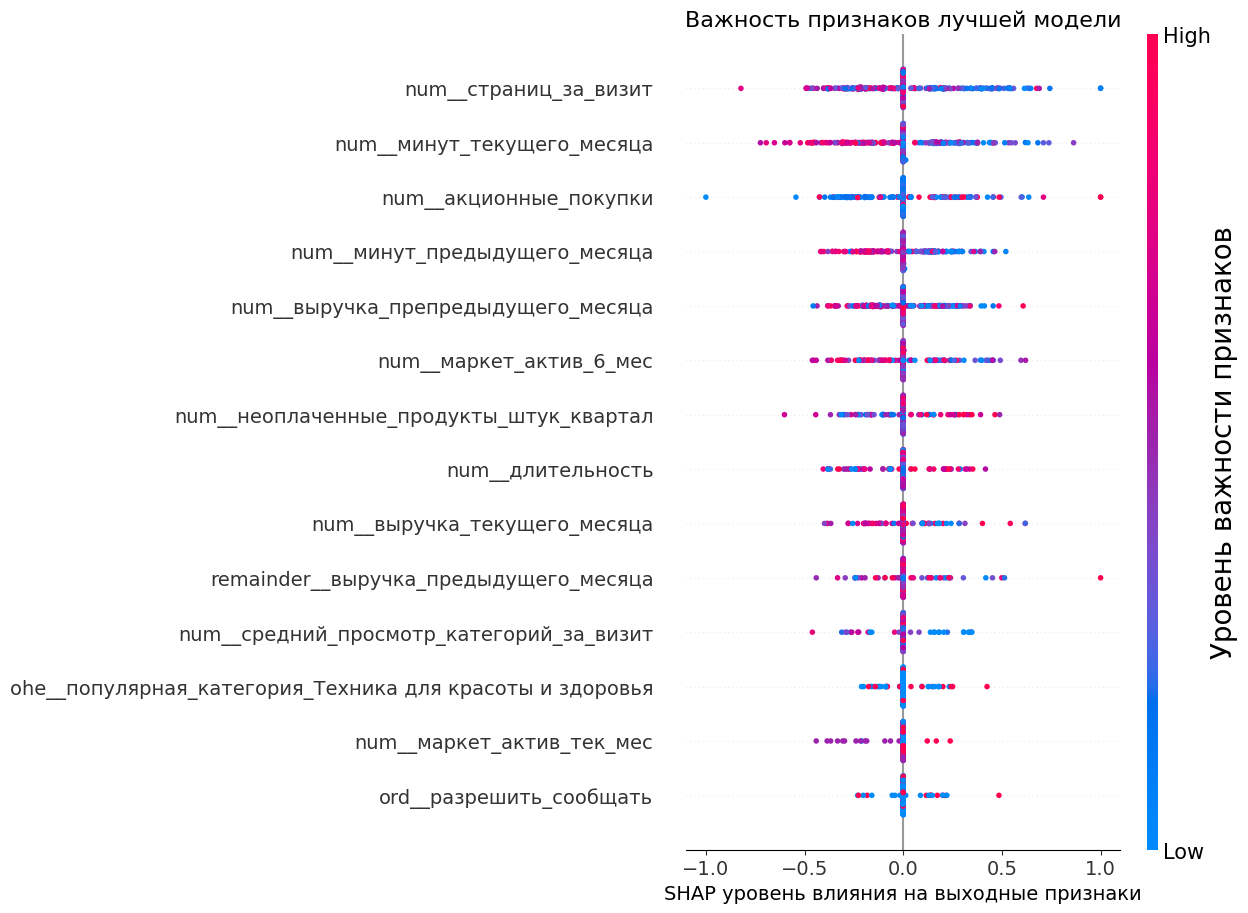

In [90]:
# Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP

best_model = model.best_estimator_
best_preprocessor = model.best_estimator_.named_steps['preprocessor']

X_train_trans = pd.DataFrame(best_preprocessor.transform(X_train), columns=best_preprocessor.get_feature_names_out())
X_test_trans = pd.DataFrame(best_preprocessor.transform(X_test), columns=best_preprocessor.get_feature_names_out())

explainer = shap.SamplingExplainer(best_model.named_steps['models'].predict, X_train_trans)
shap_values = explainer.shap_values(X_test_trans, nsamples=100, random_state=RANDOM_STATE)

shap.initjs()
shap.summary_plot(shap_values,
                  X_test_trans,
                  max_display=14,
                  plot_size=(12, 9),
                  show=False)

# Получение текущих объектов
fig, ax = plt.gcf(), plt.gca()

# параметров графика
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP уровень влияния на выходные признаки", fontsize=14)
ax.set_title('Важность признаков лучшей модели', fontsize=16)

# цветовая панель
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Уровень важности признаков", fontsize=20)

plt.show()

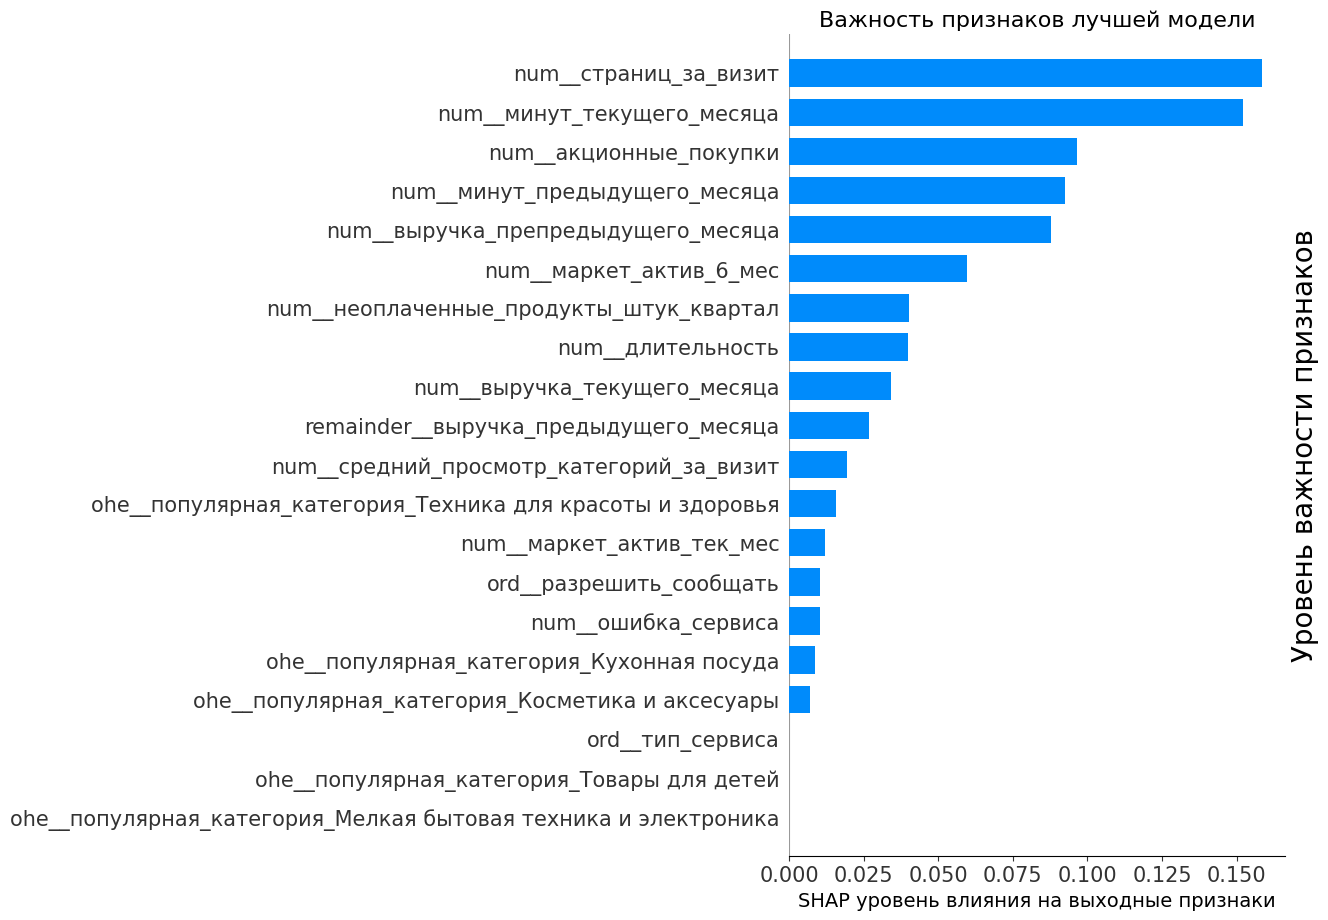

In [91]:
# Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP


shap.initjs()
shap.summary_plot(shap_values, X_test_trans, plot_type='bar', plot_size=(12, 9),show=False)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP уровень влияния на выходные признаки", fontsize=14)
ax.set_title('Важность признаков лучшей модели', fontsize=16)
cb_ax = fig.axes[0]
cb_ax.tick_params(labelsize=15)
cb_ax.yaxis.set_label_position("right")
cb_ax.set_ylabel("Уровень важности признаков", fontsize=20)
plt.show();

Отобрана лучшая модель: LogisticRegression (penalty='l1', random_state=42, solver='liblinear')

Наиболее важные признаки:

* 'страниц за визит';
* 'средний_просмотр_категорий_за_визит';
* 'минут_предыдущего/текущего_месяца';
* 'акционные покупки';
* 'маркет_актив 6 мес'.


Менее важные признаки :

* 'выручка предыдущего месяца";
* 'разрешить сообщать';
* 'маркет_актив_тек_мес';
* 'популярная_категория_Кухонная посуда';
* 'тип сервиса'.

После анализа методом SHAP можно предложить также общие рекомендации, которые могут благоприятно повлиять на бизнес:

* для увеличения продаж возможно нужно перенастроить рекомендательную системы и делать перекресный подбор товара через портрет покупателя;
* также возможно нужно перенастроить визуальную составляющую в карточке товара: качество картинки, описание продукта, кнопку в карзину, кнопку оплатить;
* снизить количество ошибок на сайте;
* создать такую систему скидок и акций для постоянных пользователей, чтобы полученные бонусы за текущую покупку являлись часть оплаты следующей покупки;
* согласно распределению категорий покупок (25% - товары для детей, 19% - домашний текстиль, 17% - косметика и аксессуары) нашей аудиторией являются женщины и возможно создание какого-то клуба или сообщества, членство в котором будет зависить от количества покупок, будет проводить встречи с популярными людьми и давать дополнительные бонусы и привилегии на других площадках (рестораны, салоны красоты, детские центры).

<div class="alert alert-info">
Количество ошибок на сайте не являются первоочередной проблемой для руководства сайта. Но это тот "желтый" флаг, который может влиять на активность клиентов, которые не хотят сталкиваться с проблемами и любят, когда все работает как часы. Данный пунк можно отнести к потенциальным вопросам на улучшения качетва работы сайта, когда первоочередные проблемы будут решены.
Для сокращения доли покупателей со сниженной активностью нужно посмотреть на маркетинговые программы и возможно настроить таргетирование для этих программ.
Тонкий момент всегда в баланке между предоставить скидки на товар и не создать кагорту покупателей, которые покупают только товар со скидкой. Маркер по таким покупателям будут признаки: 'акционные покупки' и отложенный товар в корзину.
Согласно исследовательскому анализу мы видим, что среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев у покупателей с уровня активности: «снизилась» выше, чем у другой кагорты покупателей. Можно предположить, что понравившийся продукт клиенты со сниженной покупательской активностью откладывают в корзину и ждут акций.

## Сегментация покупателей

Наша цель:
клиентам, у которых снизилась покупательская активность, сделать персональное предложение и вернуть их за покупками.

In [69]:
# Для сегментацию покупателей выведем медианное значение и стандартное отклонение для df_income


med =  df_income['прибыль'].median()
sko = np.std( df_income['прибыль'])
display("Медианное значение : ", med)
display("Стандартное отклонение : ", sko)
display(df_income['прибыль'].describe())

'Медианное значение : '

4.045

'Стандартное отклонение : '

1.0133321434255447

count   1,300.000
mean        3.997
std         1.014
min         0.860
25%         3.300
50%         4.045
75%         4.670
max         7.430
Name: прибыль, dtype: float64

In [70]:
# Функция расчета предсказаний
# Использование функции predict_proba


def custom_predict(X, threshold):
    probs = best_model.predict_proba(X)
    return (probs[:, 1] > threshold).astype(int)

In [71]:
# предсказание на данных лучшей модели с выбранным порогом


predictions_precision = custom_predict(X, threshold=0.5)
X['predictions'] = predictions_precision
X['probs'] = best_model.predict_proba(X)[:,1]
df_income['категории_прибыли'] = df_income['прибыль'].apply(lambda x: 'мало' if x < (med - sko)
                                                       else ('много' if x > (med + sko)
                                                       else 'нормально'))

# сбросим индекс и вернем индекс по умолчанию в таблицу для их объединения
X = X.reset_index()
X = pd.merge(X, df_income, on='id', sort=True)
display(X.head())

id  выручка_препредыдущего_месяца  выручка_предыдущего_месяца  \
0  215349                      4,472.000                   4,971.600   
1  215350                      4,826.000                   5,058.400   
2  215351                      4,793.000                   6,610.400   
3  215352                      4,594.000                   5,872.500   
4  215353                      5,124.000                   5,388.500   

   выручка_текущего_месяца  минут_предыдущего_месяца  минут_текущего_месяца  \
0                5,216.000                        12                     10   
1                5,457.500                         8                     13   
2                6,158.000                        11                     13   
3                5,807.500                         8                     11   
4                4,738.500                        10                     10   

  тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
0     премиум                 да               4.400                     4   
1    стандарт                нет               4.900                     3   
2    стандарт                 да               3.200                     5   
3    стандарт                нет               5.100                     3   
4    стандарт                 да               3.300                     4   

   ...  акционные_покупки  популярная_категория  \
0  ...              0.750      Товары для детей   
1  ...              0.140     Домашний текстиль   
2  ...              0.990      Товары для детей   
3  ...              0.940      Товары для детей   
4  ...              0.260     Домашний текстиль   

  средний_просмотр_категорий_за_визит  неоплаченные_продукты_штук_квартал  \
0                                   4                                   4   
1                                   5                                   2   
2                                   5                                   0   
3                                   3                                   2   
4                                   4                                   1   

   ошибка_сервиса  страниц_за_визит  predictions  probs  прибыль  \
0               2                 5            1  0.908    4.160   
1               1                 5            0  0.424    3.130   
2               6                 4            1  0.801    4.870   
3               3                 2            1  0.961    4.210   
4               1                 4            1  0.691    3.950   

   категории_прибыли  
0          нормально  
1          нормально  
2          нормально  
3          нормально  
4          нормально  

[5 rows x 21 columns]

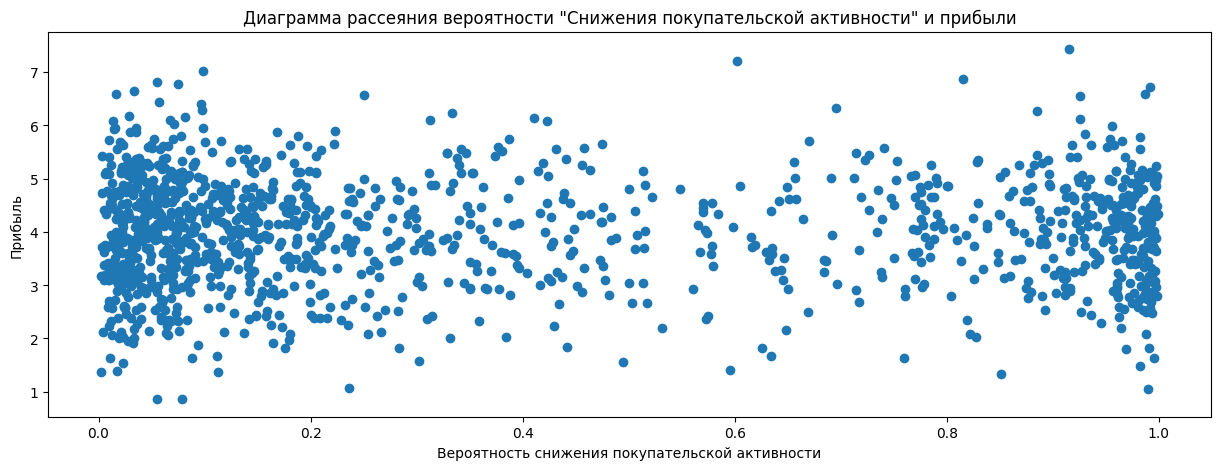

In [72]:
# построим диаграмму рассеяния вероятности "снижения покупательской активности"
# и прибыли для визуализации границы разделения на группы покупательской активности


plt.figure(figsize=[15, 5])
plt.scatter(X.probs, X.прибыль);
plt.title('Диаграмма рассеяния вероятности "Снижения покупательской активности" и прибыли')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыль')
plt.show()

Диаграмма носит распределенный характер с провалом в среднем значении.

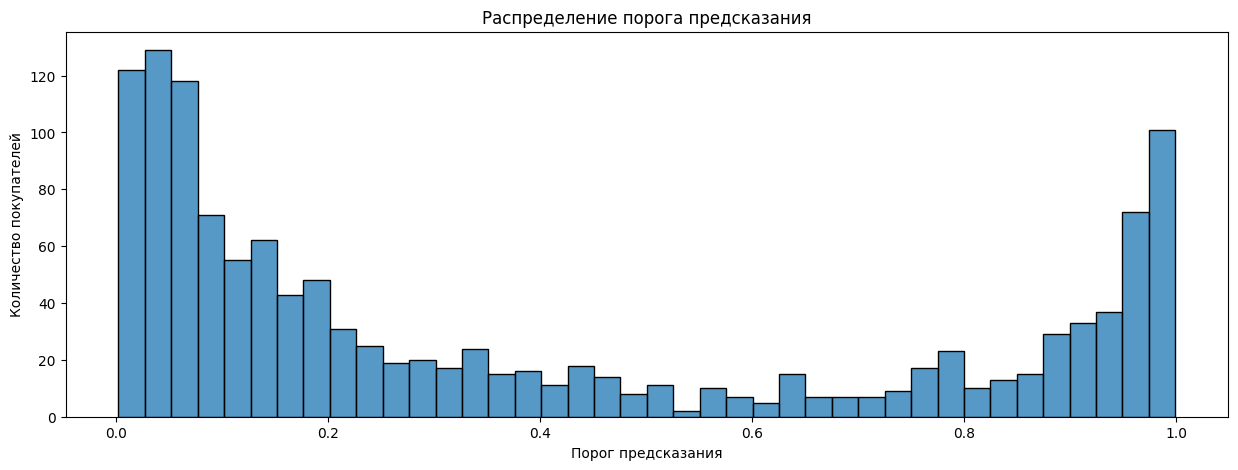

In [73]:
# построиф график распределения порога предсказания


plt.figure(figsize=[15, 5])
sns.histplot(data=X, x='probs',binwidth=0.025)
plt.title('Распределение порога предсказания')
plt.xlabel('Порог предсказания')
plt.ylabel('Количество покупателей')
plt.show()
plt.show();

In [74]:
# наша цель:
# клиентам, у которых снизилась покупательская активность, сделать персональное предложение и вернуть их за покупками.
# введем категориальный столбец в данные, определим границу разделения 0.7,
# так как диаграмме количество значений начинает возрастает от этого порога.


X['категория_снижения'] = X['probs'].apply(lambda x: 'Снизилась' if x > 0.7 else 'Прежний уровень')

In [75]:
safe_df = X[~((X['категории_прибыли'] >= 'нормально') & (X['прибыль'] >= 3))]

In [76]:
warning_df = X[(X['категории_прибыли'] >= 'мало') & (X['прибыль'] >= 3)]

In [77]:
def show_scatter(data, ax, col_name, color):
    data.plot.scatter(ax=ax,
                       x=col_name,
                       y='probs',
                       color=color,
                       title=f'Зависимость вероятности снижения активности\nцелевого пользователя от {col_name}',
                       xlabel=col_name,
                       ylabel='Покупательская активность')
def show_bar(data, ax, col_name, color):
    pivot = data.pivot_table(index=col_name, values='категории_прибыли', aggfunc='median')
    pivot.columns = ['median']
    pivot.sort_values(by='median', ascending=True, inplace=True)
    pivot.plot.barh(ax=ax,
                    color=color,
                    title=f'Зависимость вероятности снижения активности\nцелевого пользователя от {col_name}',
                    xlabel='',
                    ylabel='Покупательская активность')

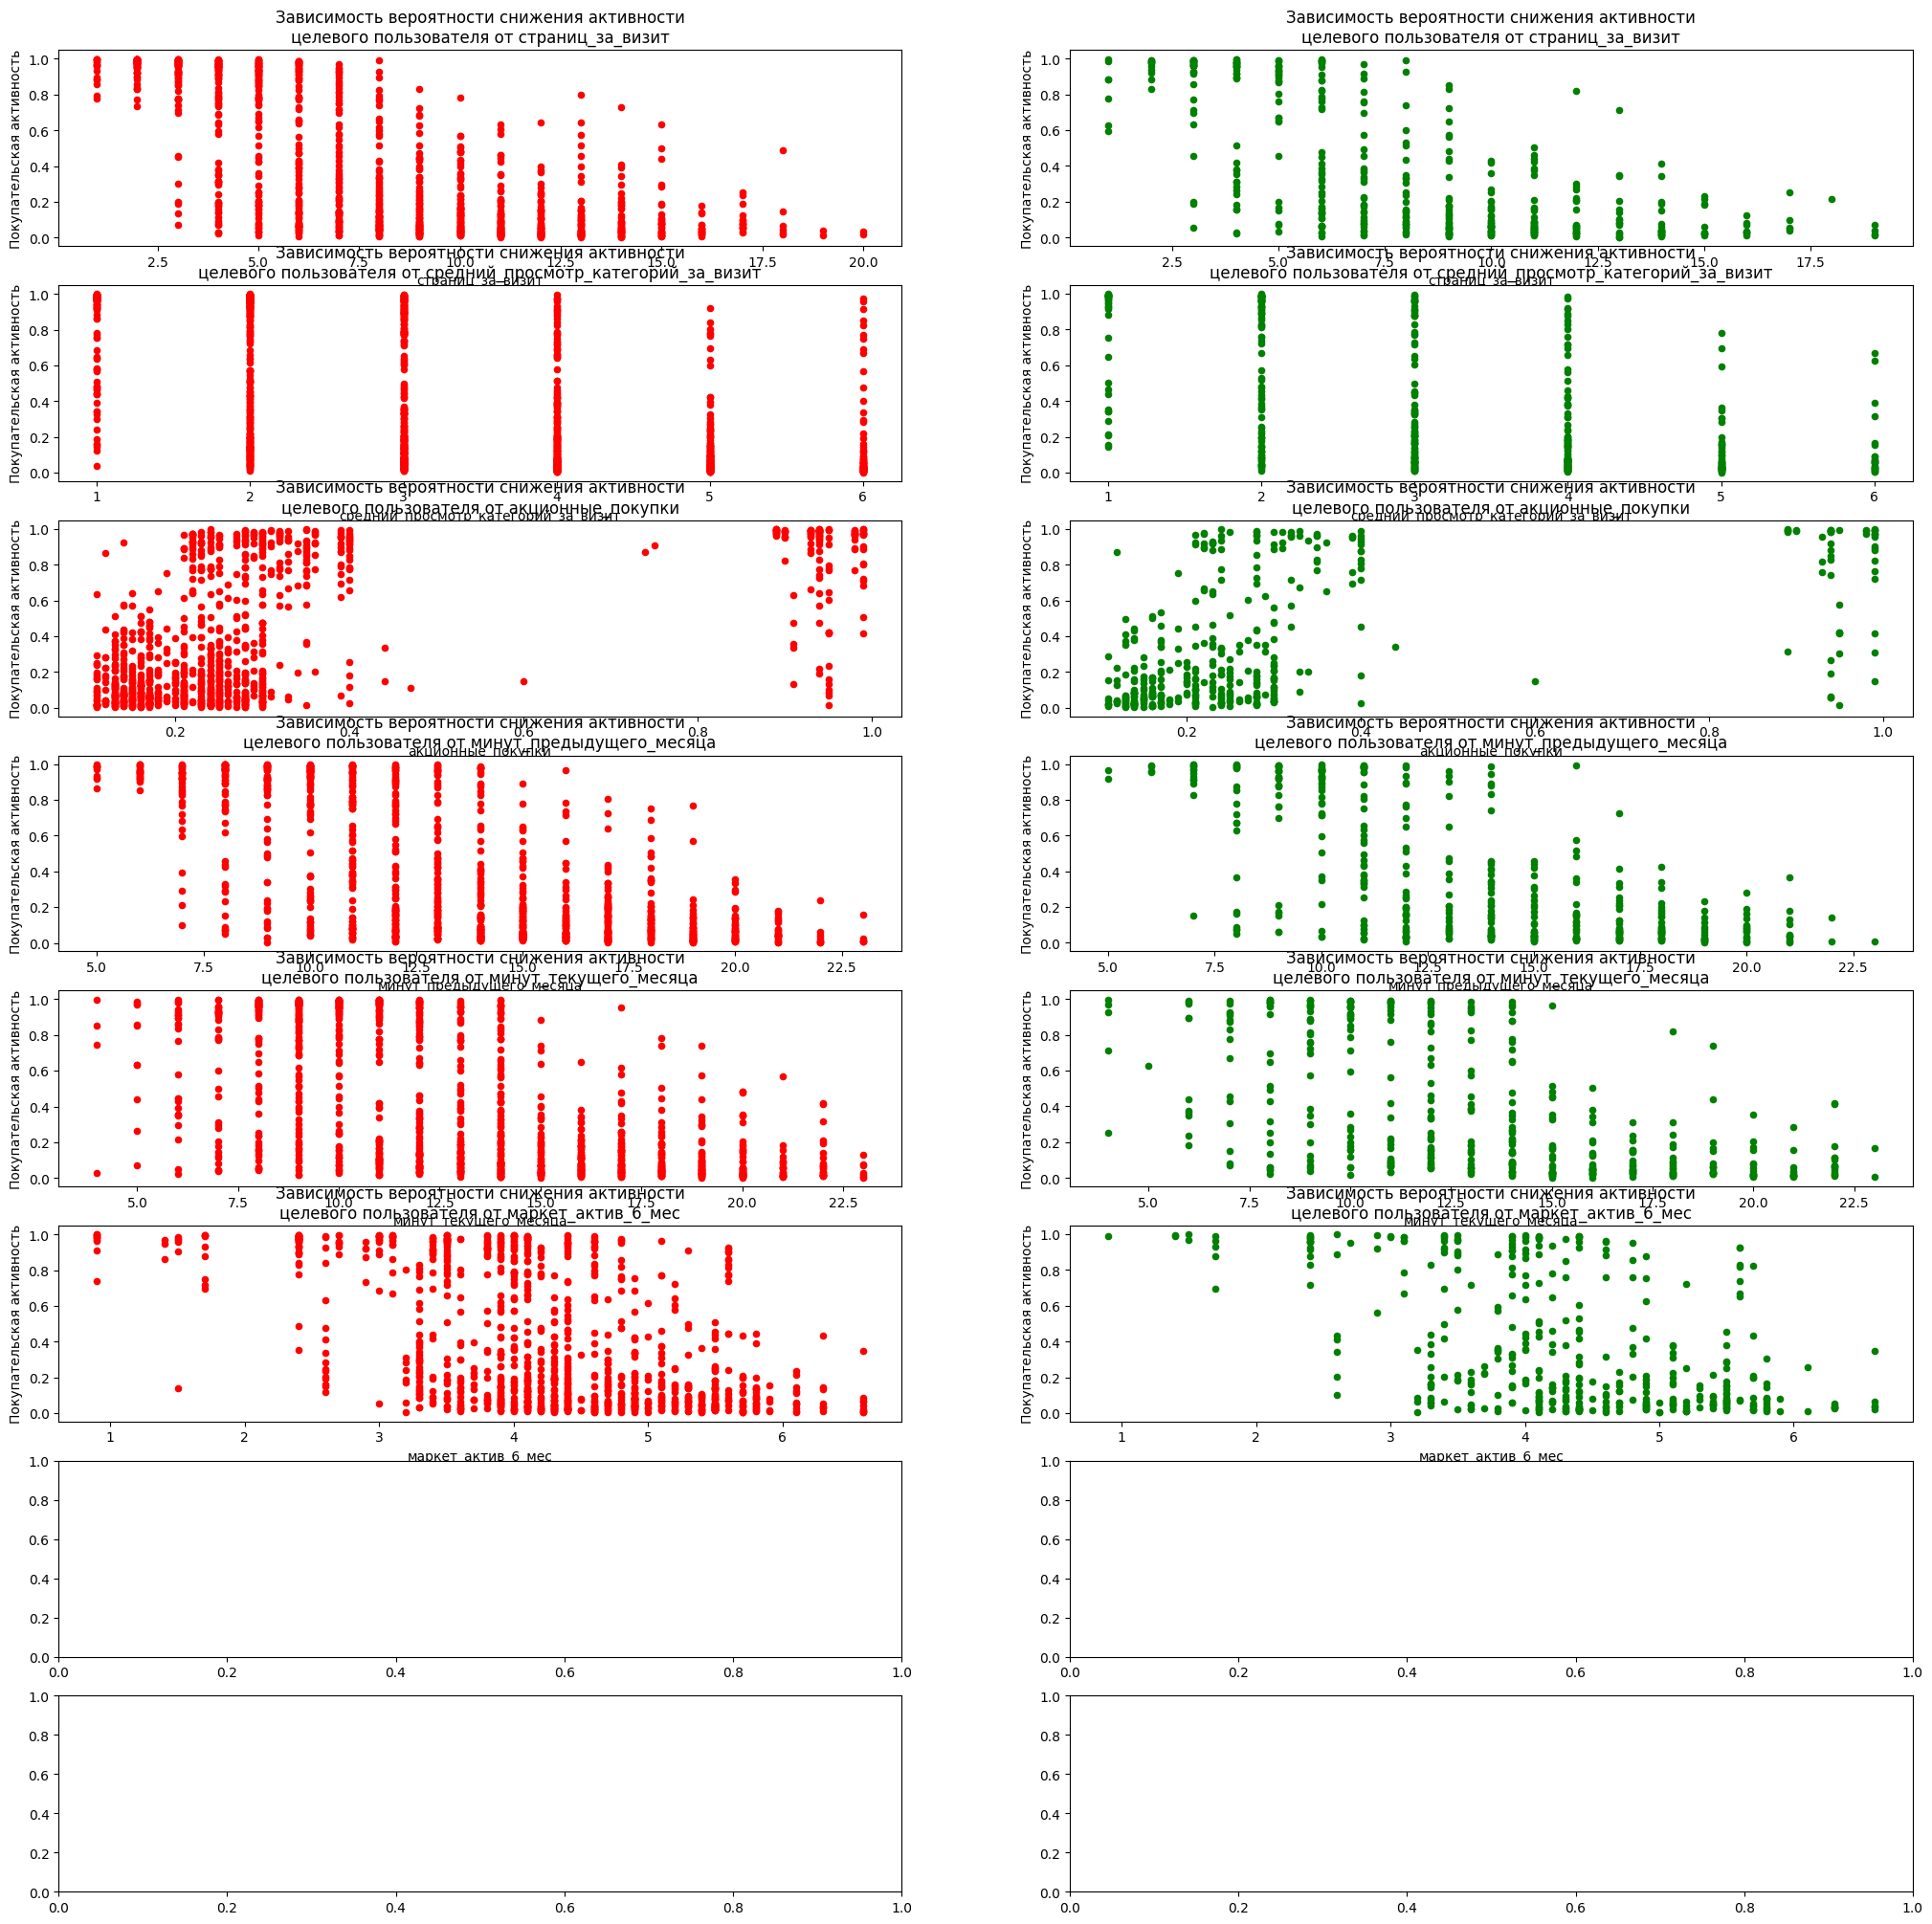

In [78]:
num_cols = [
    'страниц_за_визит',
    'средний_просмотр_категорий_за_визит',
    'акционные_покупки',
    'минут_предыдущего_месяца',
    'минут_текущего_месяца',
    'маркет_актив_6_мес',
]

cat_cols = [
    'популярная_категория',
    'неоплаченные_продукты_штук_квартал'
]

fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(25, 25))

for i in range(0, 6):
    show_scatter(warning_df, axes[i, 0], num_cols[i], 'red')
    show_scatter(safe_df, axes[i, 1], num_cols[i], 'green')


plt.show()

Вероятность снижения покупательской активности увеличивается при:
* снижение просматриваемости категорий товара;
* просматриваемости кол-ва страниц за визит;
* время проведенное на сайте;

Рассмотрим сегмент покупателей:
* покупательская способность - снизилась;
* категория прибыли - мало;
* наличие товара в корзине.

In [79]:
# сделаем фильтр по нашему сегменту


df_segment=X[(X['категория_снижения']=='Снизилась')&(X['категории_прибыли']=='мало')]
display(df_segment.head())

id  выручка_препредыдущего_месяца  выручка_предыдущего_месяца  \
13  215364                      4,942.000                   5,484.800   
16  215367                      4,668.000                   5,493.400   
19  215370                      4,535.000                   4,840.300   
21  215372                      4,762.000                   4,092.200   
41  215393                      4,909.000                   5,345.500   

    выручка_текущего_месяца  минут_предыдущего_месяца  минут_текущего_месяца  \
13                5,795.500                        11                      9   
16                5,164.500                         8                      7   
19                5,235.500                         7                     10   
21                3,866.000                         9                      9   
41                5,267.500                        12                     11   

   тип_сервиса разрешить_сообщать  маркет_актив_6_мес  маркет_актив_тек_мес  \
13     премиум                 да               4.300                     4   
16     премиум                 да               4.200                     4   
19    стандарт                 да               3.900                     4   
21    стандарт                нет               4.800                     4   
41    стандарт                нет               4.600                     4   

    ...            популярная_категория  средний_просмотр_категорий_за_визит  \
13  ...               Домашний текстиль                                    3   
16  ...                Товары для детей                                    5   
19  ...               Домашний текстиль                                    2   
21  ...           Косметика и аксесуары                                    2   
41  ...  Техника для красоты и здоровья                                    2   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
13                                  3               3                 3   
16                                  1               4                 1   
19                                  0               5                 5   
21                                  1               4                 5   
41                                  1               3                 7   

    predictions  probs  прибыль  категории_прибыли  категория_снижения  
13            1  0.975    2.670               мало           Снизилась  
16            1  0.779    3.030               мало           Снизилась  
19            1  0.911    2.820               мало           Снизилась  
21            1  0.759    1.630               мало           Снизилась  
41            1  0.760    2.930               мало           Снизилась  

[5 rows x 22 columns]

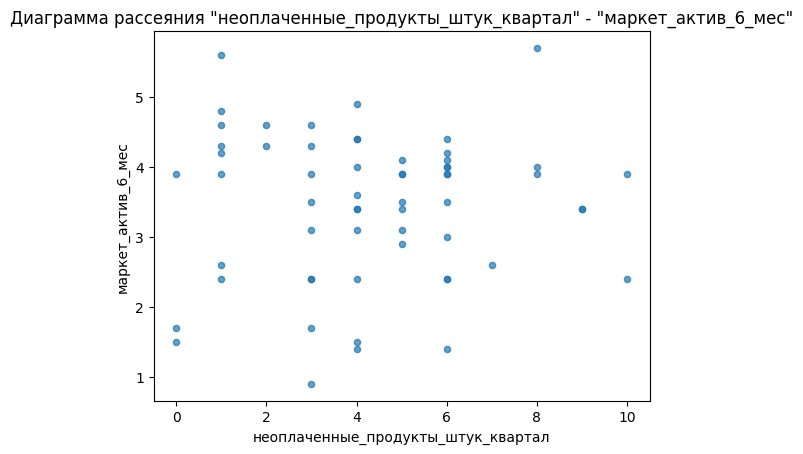

In [80]:
# Диаграмма рассеяния "неоплаченные_продукты_штук_квартал" - "маркет_актив_6_мес"


df_segment.plot(kind='scatter', x='неоплаченные_продукты_штук_квартал', y='маркет_актив_6_мес', alpha=0.7,
             title='Диаграмма рассеяния "неоплаченные_продукты_штук_квартал" - "маркет_актив_6_мес"')
plt.show()

В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) при высокой маркетинговой активности. Возможно покупатели получая маркетинговые предложения откладывают товар на "подумать" или ждут скидки, чтобы потом приобрести.

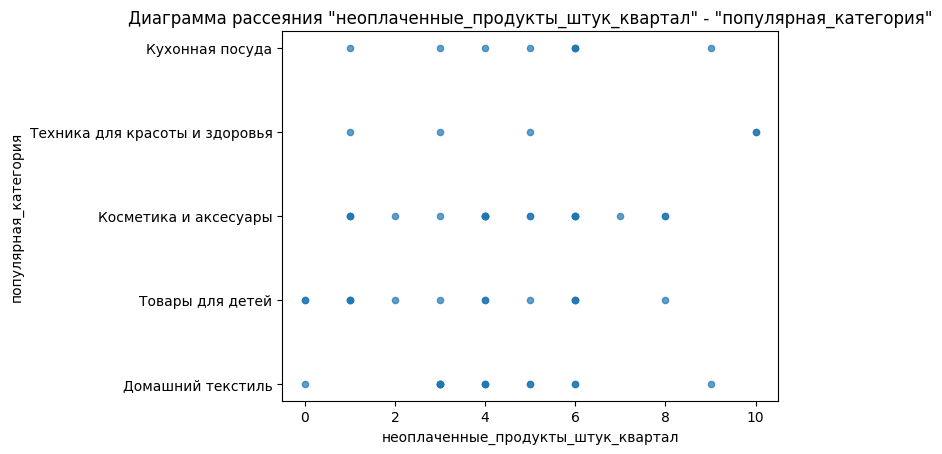

In [81]:
# Диаграмма рассеяния "неоплаченные_продукты_штук_квартал" - "популярная_категория"


df_segment.plot(kind='scatter', x='неоплаченные_продукты_штук_квартал', y='популярная_категория', alpha=0.7,
             title='Диаграмма рассеяния "неоплаченные_продукты_штук_квартал" - "популярная_категория"')
plt.show()

В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) в таких категориях, как: товары для детей, косметика и аксесуары, домашний текстиль и кухонная посуда. Мы можем предположить, что в нашем сегменте приимущественно женщины, которые имеет детей, обустраивают дом и активно следят за своим внешним видом, т.к. в категории косметика и дети кол-во отложенных товаров доходит до 8 единиц.

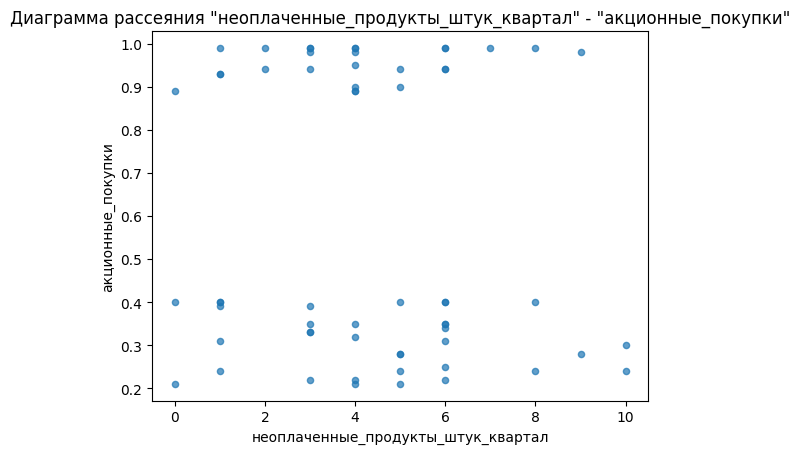

In [82]:
# Диаграмма рассеяния "неоплаченные_продукты_штук_квартал" - "акционные_покупки"


df_segment.plot(kind='scatter', x='неоплаченные_продукты_штук_квартал', y='акционные_покупки', alpha=0.7,
             title='Диаграмма рассеяния "неоплаченные_продукты_штук_квартал" - "акционные_покупки"')
plt.show()

В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) при границах среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев в нижней и верхней границах. Складывается впечатление, что товар откладывают, чтобы купить со скидкой.

<div class="alert alert-info">
При снижении покупательской активности наблюдается тренд на накопление товара в корзине (4-6 единиц) при высокой маркетинговой активности. Возможно покупатели получая маркетинговые предложения откладывают товар на "подумать" или ждут скидки, чтобы потом приобрести. В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) в таких категориях, как: товары для детей, косметика и аксесуары, домашний текстиль и кухонная посуда. Мы можем предположить, что в нашем сегменте приимущественно женщины, которые имеет детей, обустраивают дом и активно следят за своим внешним видом, т.к. в категории косметика и дети кол-во отложенных товаров доходит до 8 единиц. В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) при границах среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев в нижней и верхней границах. Складывается впечатление, что товар откладывают, чтобы купить со скидкой.
    
    Наша цель: клиентам, у которых снизилась покупательская активность, сделать персональное предложение и вернуть их за покупками.
По результатам анализа по сегментам можно предложить бизнесу следующее:  
* создать такую систему скидок и акций для постоянных пользователей, чтобы полученные бонусы за текущую покупку являлись часть оплаты следующей покупки;
* пересмотр маркетинговых активностей и точечное таргетирование акций и предложений;
* согласно распределению категорий покупок (25% - товары для детей, 19% - домашний текстиль, 17% - косметика и аксессуары) нашей аудиторией являются женщины и возможно создание какого-то клуба или сообщества, членство в котором будет зависить от количества покупок, будет проводить встречи с популярными людьми и давать дополнительные бонусы и привилегии на других площадках (рестораны, салоны красоты, детские центры);
* проведение опросов у аудитории с низкой покупательской активностью о причинах ее снижения.

* были изменены гиперпараметры для модели Дерево решений.
Было: max_depth: range (2, 50);
Стало: max_depth: range (1, 500).

Данные изменения привели к изменению метрики ROC-AUC и самой модели от лучшего к "похуже":
было - модель: Логистическая регрессия, ROC-AUC = 0.89;
стало - модель: Дерево решений, ROC-AUC = 0.81;

## Итоговые выводы

Перед нами была поставлена задача разработать решение для персонализации предложений постоянным клиентам, чтобы увеличить их покупательскую активность.

В нашем распоряжении было четыре датасета:

* market_file.csv — данные о поведении покупателя на сайте, коммуникациях с ним и его продуктовом поведении;
* market_money.csv — данные о выручке, получаемой магазином от покупателя за период взаимодействия;
* market_time.csv — данные о времени, проведенном покупателем на сайте в течение периода;
* money.csv — данные о среднемесячной прибыли покупателя за последние три месяца.

Для осуществления поставленной задачи, проект был разбит на этапы:

1.  загрузка датасетов и первичное чтение:
* Первый файл содержит информацию о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Состоит из 1300 строк и 13 столбцов;
* Второй файл содержит информацию: о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Датафрейм состоит из 3900 строк и 3 столбцов;
* Третий файл с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Датафрейм состоит из 2600 строк и 3 столбцов.
* Четвертый файл с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Датафрейм состоит из 1300 строк и 2 столбцов.
Критических ошибок при чтении файлов не обнаружено и данные датафреймов можно использовать далее для предобработке и анализа.

2.	предобработка данных:

Были проведены следующие операции:
1) в четырех датафреймах название столбцов переведены в нижний регистр и заменены пробелы на "нижнее подчеркивание";
2) в датафрейме df_income столбец "прибыль" был переведен из типа object в тип float;
3) явные дубликаты не выявлены;
4) выявлен один неявный дубликат в датафрейме df_market в столбце "тип_сервиса". Заменили "стандартт" на "стандарт";
5) исправлена орфографическая ошибка в df_time в столбце "период".

3.	исследовательский анализ данных:

Наблюдается дисбаланс классов у целевого признака "покупательская_активность", распределение 62% - "прежний уровень" и 38% - "снизилось". Большинство пользователей пользуются стандартным сервисом - 924 пользователя vs 376 пользователей - "премиум". Самая популярная категория товаров - товары для детей: 25%, на втором месте: домашний текстиль - 19%. Время поверенное пользователями на сайте в прошлом и текущем месяцах одинаковое.
Замечена аномально высокая выручка в размере 106,862.200 условных единиц (размерность не известна), выбивается из общей картины. Выручка по периодам распределяется равномерно.

4. об'единение датафреймов:

* данные из датафреймов market_file, market_money и market_time были объединены в одну таблицу по общему столбцу - 'id' пользователя;
* после объединения была проведена проверка размерности, наличия пропусков и типов данных;

5. корреляционный анализ:

Между входными параметрами отсутствует связь выше 0.9. Будем считать, что мультиколлинеарность отсутствует.
Максимальное значение корреляция Спирмена = 0.88 между выручками предыдущего и текущего месяцов. Данные признаки, с точки зрения логики, не должны коррелироваться между собой и влиять друг на друга.
Максимальное значение корреляция phi(k) = 0.75 между "покупательская_активность" (целевой признак) и "страниц за визит". Также показатель 0.69 и 0.58 у целевого признака с признаками "минуты предыдущего и текущего месяцов".

6.	создание пайплайнов и построение модели:

* была проведена подготовка данных в виде разделения их на тренировочную и тестовую выборки, а также в виде разделения на категориальные и количественные данные;
* для поиска лучшей модели и её гиперпараметров использовались пайплайны вместе с методом RandomizedSearchCV;
* в качестве моделей рассматривались: LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier;
* в качестве метрики оценки модели была выбрана - ROC-AUC.

Отобрана лучшая модель: LogisticRegression (penalty='l1', random_state=42, solver='liblinear')

Метрика качества (ROC-AUC) оказалась следующей:

0.896 на тренировочных данных;
0.923 на тестовых.

Наиболее важные признаки:

* 'страниц за визит';
* 'средний_просмотр_категорий_за_визит';
* 'минут_предыдущего/текущего_месяца';
* 'акционные покупки';
* 'маркет_актив 6 мес'.


Менее важные признаки :

* 'выручка предыдущего месяца";
* 'разрешить сообщать';
* 'маркет_актив_тек_мес';
* 'популярная_категория_Кухонная посуда';
* 'тип сервиса'.


После анализа методом SHAP можно предложить также общие рекомендации, которые могут благоприятно повлиять на бизнес:

* для увеличения продаж возможно нужно перенастроить рекомендательную системы и делать перекресный подбор товара через портрет покупателя;
* также возможно нужно перенастроить визуальную составляющую в карточке товара: качество картинки, описание продукта, кнопку в карзину, кнопку оплатить;
* снизить количество ошибок на сайте;
* создать такую систему скидок и акций для постоянных пользователей, чтобы полученные бонусы за текущую покупку являлись часть оплаты следующей покупки;
* согласно распределению категорий покупок (25% - товары для детей, 19% - домашний текстиль, 17% - косметика и аксессуары) нашей аудиторией являются женщины и возможно создание какого-то клуба или сообщества, членство в котором будет зависить от количества покупок, будет проводить встречи с популярными людьми и давать дополнительные бонусы и привилегии на других площадках (рестораны, салоны красоты, детские центры).

7. сегментация покупателей

Для анализа был выбран сегмент, в котором пользователи имеют наибольшую вероятность снизить активность, и при этом имеют наибольшую потенциальную прибыль.

Группа клиентов, у которых количество акционных товаров не превышает 2 единиц.

В этом сегменте наблюдается снижение покупательской активности, особенно у клиентов с количеством акционных покупок, менее 2 единиц. Возможно, это связано с уменьшением рекламных кампаний по акциям.

Рекомендации:

Выделить таких клиентов в отдельную рабочую группу.
Активно предлагать им акционные товары и проводить рекламные кампании.
Задерживать их внимание на страницах сайта: при просмотре более 6 страниц активность остается на прежнем уровне.
Увеличение числа просмотренных страниц приведет к увеличению времени, проведенного на сайте: при более чем 10 минутах вероятность сохранения покупательской активности повышается.

Группа клиентов с высокой прибыльностью и более 2 неоплаченных покупок в корзине.

В этом сегменте также наблюдается значительное снижение покупательской активности.

Рекомендации:

Выделить этих клиентов в отдельную рабочую группу и для увеличения их активности.
Уведомлять их, если в корзине более 3 неоплаченных товаров. Это может вернуть их на сайт, повысить важные метрики и увеличить покупательскую активность.

<div class="alert alert-info">
## Итоговые выводы

7. сегментация покупателей

Для анализа был выбран сегмент, в котором пользователи имеют наибольшую вероятность снизить активность, и при этом имеют потенциальную прибыль.

При снижении покупательской активности наблюдается тренд на накопление товара в корзине (4-6 единиц) при высокой маркетинговой активности. Возможно покупатели получая маркетинговые предложения откладывают товар на "подумать" или ждут скидки, чтобы потом приобрести. В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) в таких категориях, как: товары для детей, косметика и аксесуары, домашний текстиль и кухонная посуда. Мы можем предположить, что в нашем сегменте приимущественно женщины, которые имеет детей, обустраивают дом и активно следят за своим внешним видом, т.к. в категории косметика и дети кол-во отложенных товаров доходит до 8 единиц. В нашем сегменте покупателей наблюдается тренд накопления товара (4-6 единиц) при границах среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев в нижней и верхней границах. Складывается впечатление, что товар откладывают, чтобы купить со скидкой.
    
    Наша цель: клиентам, у которых снизилась покупательская активность, сделать персональное предложение и вернуть их за покупками.
По результатам анализа по сегментам можно предложить бизнесу следующее:  
* создать такую систему скидок и акций для постоянных пользователей, чтобы полученные бонусы за текущую покупку являлись часть оплаты следующей покупки;
* пересмотр маркетинговых активностей и точечное таргетирование акций и предложений;
* согласно распределению категорий покупок (25% - товары для детей, 19% - домашний текстиль, 17% - косметика и аксессуары) нашей аудиторией являются женщины и возможно создание какого-то клуба или сообщества, членство в котором будет зависить от количества покупок, будет проводить встречи с популярными людьми и давать дополнительные бонусы и привилегии на других площадках (рестораны, салоны красоты, детские центры);
* проведение опросов у аудитории с низкой покупательской активностью о причинах ее снижения.